# Set up the environment

In [91]:
#!pip install plotly_express os gc

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import os, gc
import warnings

In [93]:
%pwd
%cd C:\\Users\\pangy\\OneDrive - Asia Pacific University\\Capstone project

C:\Users\pangy\OneDrive - Asia Pacific University\Capstone project


In [94]:
warnings.filterwarnings('ignore')

# Setting up display parameters
%matplotlib inline
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',10000)
pd.set_option('display.max_colwidth', None)

## Import Required Datasets 

In [95]:
# Import dataset
fileloc='LendingClub_dataset/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
lc = pd.read_csv(fileloc)

# Create a backup of the lc dataset
lc_bk = lc.copy()

### Initial Data Exploration (IDA)

In [96]:
# Size of the backup lc dataset
lc_bk.shape

(2260701, 151)

In [97]:
lc.shape

(2260701, 151)

In [98]:
lc.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [99]:
# Check how many nulls values/ missing values in each of the present columns
lc.isnull().sum().sort_values(ascending=False)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_last_payment_amount                  2249784
hardship_payoff_balance_amount                2249784
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_length                               2249784
payment_plan_start_date                       2249784
hardship_amount                               2249784
settlement_term                               2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

In [100]:
# Calculate the percentage of missing values in the columns
percentage_of_mv = lc.isnull().mean()*100
table_percentage_mv = pd.DataFrame({'Columns': percentage_of_mv.index, '% of missing values': percentage_of_mv.values})
# This code will calculate the percentage of missing values in the each column

table_percentage_mv.sort_values(by='% of missing values', ascending=False)

,Columns,% of missing values
1,member_id,100.000000
140,orig_projected_additional_accrued_interest,99.617331
135,hardship_end_date,99.517097
134,hardship_start_date,99.517097
129,hardship_type,99.517097
130,hardship_reason,99.517097
131,hardship_status,99.517097
132,deferral_term,99.517097
142,hardship_last_payment_amount,99.517097
141,hardship_payoff_balance_amount,99.517097


In [101]:
# Drop columns with missing values more 30%
lc.drop(percentage_of_mv[percentage_of_mv > 30].index, axis =1, inplace = True)

In [102]:
# Check the percentage of missing values in the columns after removing columns with more than 30% missing values
percentage_of_mv_after_dropping = lc.isnull().mean()*100
table_percentage_mv_after_dropping = pd.DataFrame({'Columns': percentage_of_mv_after_dropping.index, '% of missing values': percentage_of_mv_after_dropping.values})
# This code will calculate the percentage of missing values in the each column
table_percentage_mv_after_dropping.sort_values(by='% of missing values', ascending=False)

,Columns,% of missing values
67,mths_since_recent_inq,13.069751
9,emp_title,7.387178
78,num_tl_120dpd_2m,6.798334
10,emp_length,6.499754
61,mo_sin_old_il_acct,6.153136
58,bc_util,3.366389
83,percent_bc_gt_75,3.335779
57,bc_open_to_buy,3.316140
66,mths_since_recent_bc,3.248771
82,pct_tl_nvr_dlq,3.116909


In [103]:
lc.shape

(2260701, 93)

### Data cleaning on the target variable

In [104]:
# Check the number of missing values /  null in the target variable
lc['loan_status'].isnull().sum()

33

There are 33 missing values in the loan_status target variable. We have to remove them as we could not predict or impute the missing values in target variable otherwise it would be biased.

In [105]:
# See which rows have missing value for loan_status
lc.loc[lc.loan_status.isnull(),['loan_status']]

,loan_status
421095,NaN
421096,NaN
528961,NaN
528962,NaN
651664,NaN
651665,NaN
749520,NaN
749521,NaN
877716,NaN
877717,NaN


In [106]:
# Drop the rows with missing values in loan_status
lc = lc.dropna(subset=['loan_status'])

In [107]:
lc.loc[lc.loan_status.isnull(),['loan_status']]

,loan_status


no more missing values in loan status column

In [108]:
print(lc.loan_status.unique())
print('\n')
print(lc.loan_status.nunique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


9


In [109]:
pd.value_counts(lc.loan_status).to_frame().reset_index()

,loan_status,count
0,Fully Paid,1076751
1,Current,878317
2,Charged Off,268559
3,Late (31-120 days),21467
4,In Grace Period,8436
5,Late (16-30 days),4349
6,Does not meet the credit policy. Status:Fully Paid,1988
7,Does not meet the credit policy. Status:Charged Off,761
8,Default,40


Need to remove 'current' and other status such as in grace period or late as we are not sure about the future status of the loan, it can be default or non-default. Then, categorise the loan status into two main levels only, default and non-default.

In [110]:
lc.shape,lc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Data columns (total 93 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                     

((2260668, 93), None)

In [111]:
# Categorise the loan status into two main loan status, default and non-default only.
# First define default status
default_status = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
non_default_status = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']

In [112]:
count_default = lc['loan_status'].isin(default_status).sum()
count_other = len(lc) - count_default
print(count_default, count_other)
print(100*(count_default/len(lc['loan_status'])))

269360 1991308
11.915062273628857


around 11.9% of the status are default cases.

In [113]:
count_default = 0
count_other = 0

for n in lc['loan_status']:  # Process the first 1000 rows for testing
    if n in default_status:
        count_default += 1
    else:
        count_other += 1
print(count_default, count_other)

269360 1991308


In [114]:
# Now, change the loan status of rows to default and non default according to their categories
for status in default_status:
    lc.loc[lc['loan_status'] == status ,'loan_status'] = 'Default'

for status in non_default_status:
    lc.loc[lc['loan_status'] == status ,'loan_status'] = 'Non-default'

In [115]:
lc.value_counts('loan_status').to_frame().reset_index()

,loan_status,count
0,Non-default,1078739
1,Current,878317
2,Default,269360
3,Late (31-120 days),21467
4,In Grace Period,8436
5,Late (16-30 days),4349


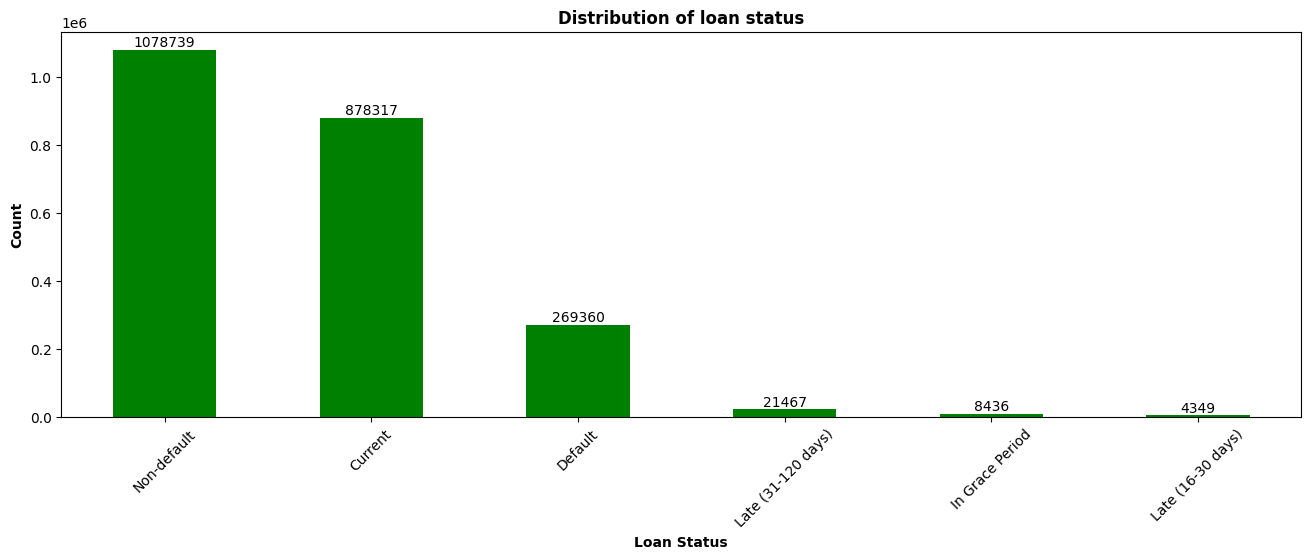

In [116]:
# Plot the distribution of loan status
plt.figure(figsize=(16,5))
lc['loan_status'].value_counts().plot(kind='bar' , color='green')

# Add counts as annotations on top of the bars
for x, y in enumerate(lc['loan_status'].value_counts()):
    plt.text(x, y + 1000, str(y), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of loan status',fontweight='bold')
plt.xlabel('Loan Status',fontweight='bold')
plt.xticks(rotation=45, fontsize = 10)
plt.ylabel('Count',fontweight='bold')
plt.show()

In [117]:
# FInd the % of loan status with current
len(lc.loc[lc['loan_status'] == 'Current', 'loan_status'])/ len(lc['loan_status']) *100

38.85210035263913

Around 38.85% are made up of current.

Now, look at the number of records in each year

<Figure size 1000x600 with 0 Axes>

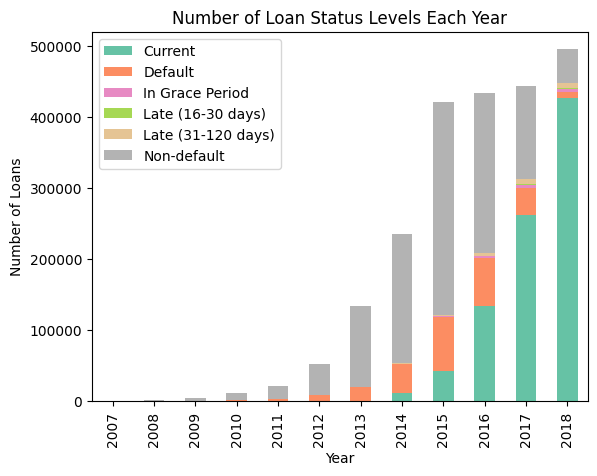

In [118]:
# TO SEE THE DISTRIBUTION OF LOAN STATUS LEVELS IN EACH YEAR
lc['issue_d'] = pd.to_datetime(lc['issue_d']) # First, convert issue date to datetime format first

# Get counts of unique loan status levels for each year
status_counts_by_year = lc.groupby([lc['issue_d'].dt.year, 'loan_status']).size().unstack() 
# Calculate the total count of loans for each year
total_loans_by_year = status_counts_by_year.sum(axis=1)

plt.figure(figsize=(10, 6)) # Plot the counts
bars = status_counts_by_year.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Number of Loan Status Levels Each Year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.show()

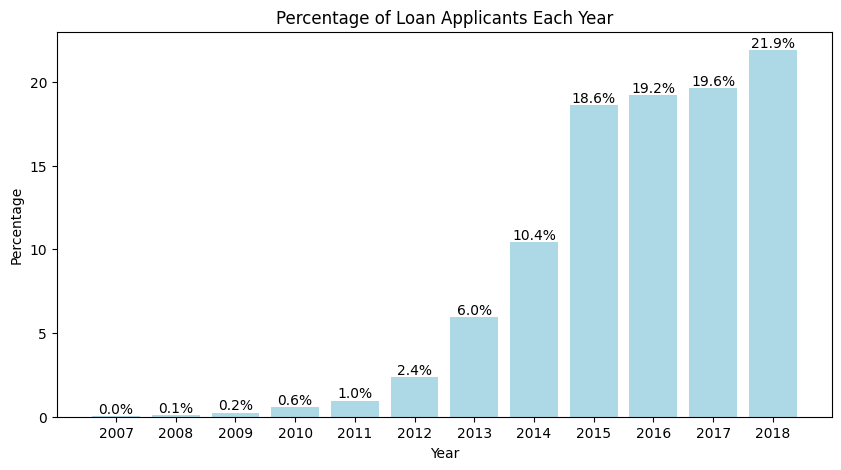

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# First convert 'issue_d' column to datetime
lc['issue_d'] = pd.to_datetime(lc['issue_d'])
# Get counts of rows for each year
counts_by_year = lc['issue_d'].dt.year.value_counts().sort_index()
# Calculate the percentage of records in each year
percentage_by_year = (counts_by_year / counts_by_year.sum()) * 100

plt.figure(figsize=(10, 5))
bars = plt.bar(percentage_by_year.index, percentage_by_year.values, color='lightblue')

# Add percentage as annotations on the bars
for bar, perc in zip(bars, percentage_by_year):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{perc:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Loan Applicants Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(counts_by_year.index, counts_by_year.index)
plt.show()


In [120]:
# Find the percentage of rows in issue year 2015,2016,2017,2018
required_years = [2015,2016,2017,2018]
len(lc.loc[lc['issue_d'].dt.year.isin(required_years),'issue_d'])/len(lc['issue_d'])*100

79.3713628007297

Most of the rows are from 2015 to 2018. Made up around 79% 

In [121]:
len(lc.loc[lc['loan_status'] == 'Current', 'loan_status'])/ len(lc['loan_status']) *100

38.85210035263913

Around 38.85% of the loan status are current. But rows with current in loan_status will be deleted.

In [122]:
status_counts_by_year

loan_status,Current,Default,In Grace Period,Late (16-30 days),Late (31-120 days),Non-default
issue_d,,,,,,
2007,NaN,158.0,NaN,NaN,NaN,445.0
2008,NaN,496.0,NaN,NaN,NaN,1897.0
2009,NaN,723.0,NaN,NaN,NaN,4558.0
2010,NaN,1757.0,NaN,NaN,NaN,10780.0
2011,NaN,3297.0,NaN,NaN,NaN,18424.0
2012,NaN,8644.0,NaN,NaN,NaN,44723.0
2013,6.0,21024.0,1.0,NaN,3.0,113780.0
2014,11919.0,41162.0,200.0,73.0,334.0,181941.0
2015,43299.0,75804.0,612.0,279.0,1359.0,299742.0


In [123]:
# Remove all rows where 'loan_status' is 'Current', in grace period and late
to_delete_from_loan_status = ['Current', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)']
lc = lc[~lc['loan_status'].isin(to_delete_from_loan_status)]

In [124]:
lc['loan_status'].unique(), len(lc['loan_status'].unique())

(array(['Non-default', 'Default'], dtype=object), 2)

now left with only 2 levels in the loan_status, Default or Non-default only...

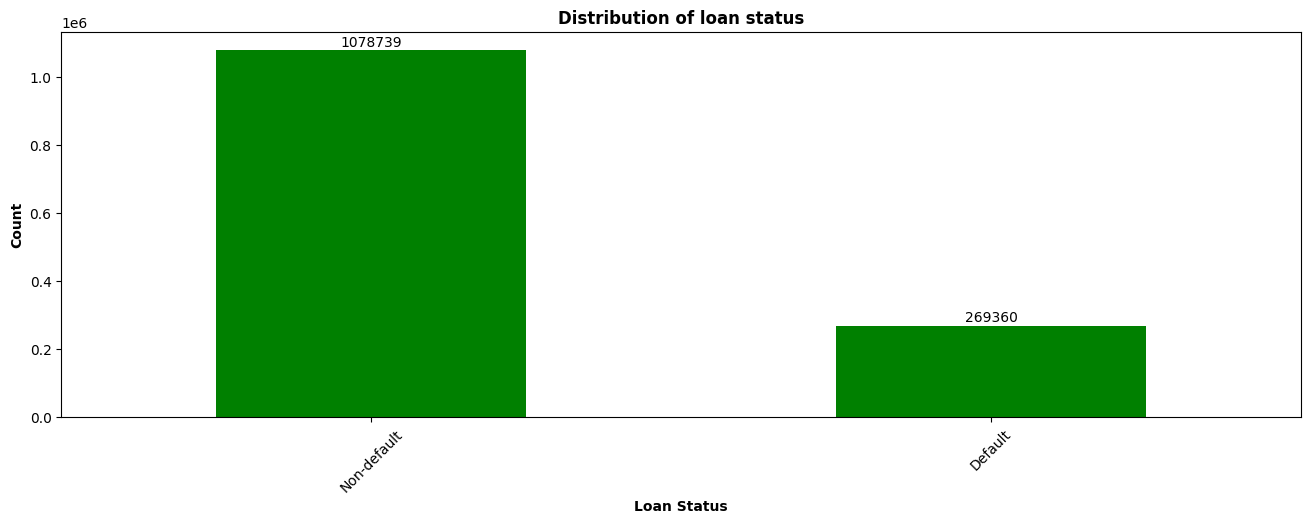

In [125]:
# Plot the distribution of loan status with only 2 levels 
plt.figure(figsize=(16,5))
lc['loan_status'].value_counts().plot(kind='bar' , color='green')

# Add counts as annotations on top of the bars
for x, y in enumerate(lc['loan_status'].value_counts()):
    plt.text(x, y + 1000, str(y), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of loan status',fontweight='bold')
plt.xlabel('Loan Status',fontweight='bold')
plt.xticks(rotation=45, fontsize = 10)
plt.ylabel('Count',fontweight='bold')
plt.show()

<Figure size 1000x600 with 0 Axes>

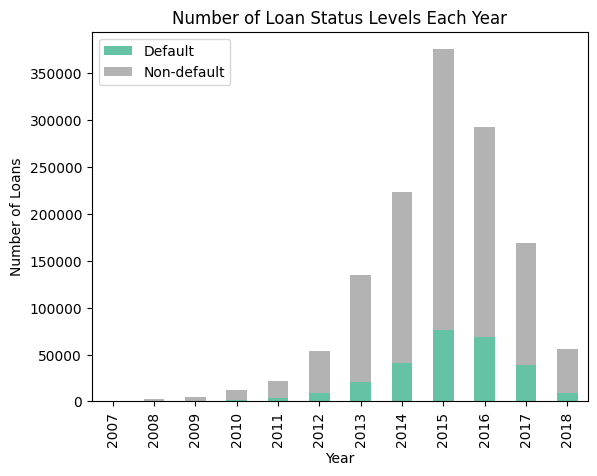

In [126]:
# TO SEE THE DISTRIBUTION OF LOAN STATUS LEVELS IN EACH YEAR 
lc['issue_d'] = pd.to_datetime(lc['issue_d']) # First, convert issue date to datetime format first

# Get counts of unique loan status levels for each year
status_counts_by_year = lc.groupby([lc['issue_d'].dt.year, 'loan_status']).size().unstack() 
# Calculate the total count of loans for each year
total_loans_by_year = status_counts_by_year.sum(axis=1)

plt.figure(figsize=(10, 6)) # Plot the counts
bars = status_counts_by_year.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Number of Loan Status Levels Each Year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.show()

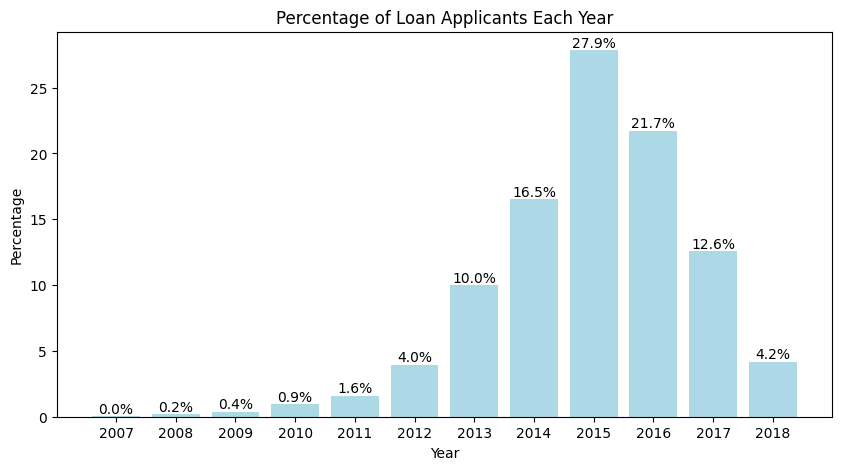

In [127]:
# After transformation
import pandas as pd
import matplotlib.pyplot as plt

# First convert 'issue_d' column to datetime
lc['issue_d'] = pd.to_datetime(lc['issue_d'])
# Get counts of rows for each year
counts_by_year = lc['issue_d'].dt.year.value_counts().sort_index()
# Calculate the percentage of records in each year
percentage_by_year = (counts_by_year / counts_by_year.sum()) * 100

plt.figure(figsize=(10, 5))
bars = plt.bar(percentage_by_year.index, percentage_by_year.values, color='lightblue')

# Add percentage as annotations on the bars
for bar, perc in zip(bars, percentage_by_year):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{perc:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Loan Applicants Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(counts_by_year.index, counts_by_year.index)
plt.show()


### IDA on the other variables

In [53]:
# Check the number of unique values in each columns 
# create dictionary to store column name and unique counts first
nunique_dict = {}

# Iterate through all columns and print the number of unique values
for col in lc.columns:
    unique_count = lc[col].nunique()
    nunique_dict[col] = unique_count

# Make the dict into dataframe
nunique_df = pd.DataFrame(list(nunique_dict.items()), columns=['Column', 'Unique Values Count'])
nunique_df


,Column,Unique Values Count
0,id,1348099
1,loan_amnt,1560
2,funded_amnt,1560
3,funded_amnt_inv,10041
4,term,2
5,int_rate,672
6,installment,83531
7,grade,7
8,sub_grade,35
9,emp_title,379863


Remove url column since it is not useful for anything. Since only the first 3 numbers of the zip-code provided by the borrower in the loan application, delete zip_code column as well.
Drop 'title' since there are 63k unique values.
'pymnt_plan','hardship_flag','policy_code' will be dropped since there are only have one unique value , meaningless

In [54]:
# Remove url column since it is not useful for anything
# Since only the first 3 numbers of the zip-code provided by the borrower in the loan application, delete zip_code column as well
cols_to_delete = ['url','zip_code','pymnt_plan','hardship_flag','policy_code','title'] 
lc.drop(cols_to_delete, axis =1 , inplace = True)

### Reduce the feature dimensionality thru literature review
filtering from 90+ to 20+

In [58]:
filtered_features = ['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 
                     'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
                     'chargeoff_within_12_mths', 'delinq_2yrs', 'delinq_amnt', 'dti', 
                     'earliest_cr_line', 'emp_length', 'home_ownership', 
                     'inq_last_6mths', 'loan_amnt','loan_status', 'mort_acc', 'open_acc', 'percent_bc_gt_75', 
                     'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'addr_state', 'revol_util', 
                     'tax_liens', 'term','total_acc', 'verification_status','fico_range_low','fico_range_high']


In [56]:
len(filtered_features)

31

In [59]:
# Now, reduce the feature dimensionality to include only features used in the literature review and also outcomes of IDA
lc_filtered = lc[filtered_features]

#lc_filtered = lc.drop[lc.columns[~lc.columns.isin(filtered_features)], axis=1, inplace = True]
# or using this lc_filtered2 = lc.loc[:,filtered_features]

In [60]:
lc_filtered.shape, lc.shape

((1348099, 31), (1348099, 87))

### Data Transformation

#### emp_length variable

In [61]:
# Transform and convert the emp_length into integer
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    '0': 0
}

lc_filtered['emp_length_int'] = lc_filtered['emp_length'].map(emp_length_mapping)

In [62]:
lc_filtered.shape

(1348099, 32)

In [63]:
# Drop emp_length because already transformed to emp_length_int
lc_filtered.drop('emp_length', axis=1, inplace=True) 

In [64]:
# Check the number of rows with missing values in the 'emp_length_int' column
lc_filtered['emp_length_int'].isnull().sum()

78550

In [65]:
# Fill the missing values in the 'emp_length_int' with 0
lc_filtered['emp_length_int'] = lc_filtered['emp_length_int'].fillna(0)

In [66]:
lc_filtered['emp_length_int'].isnull().sum()

0

#### Region variable

In [67]:
# Convert and transform state variable to region
region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'Southwest', 'TX': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'GA': 'Southeast', 'NC': 'Southeast', 'VA': 'Southeast', 'FL': 'Southeast', 'KY': 'Southeast',
    'SC': 'Southeast', 'LA': 'Southeast', 'AL': 'Southeast', 'WV': 'Southeast', 'DC': 'Southeast',
    'AR': 'Southeast', 'DE': 'Southeast', 'MS': 'Southeast', 'TN': 'Southeast',
    'IL': 'Midwest', 'MO': 'Midwest', 'MN': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'KS': 'Midwest', 'MI': 'Midwest', 'SD': 'Midwest', 'IA': 'Midwest', 'NE': 'Midwest',
    'IN': 'Midwest', 'ND': 'Midwest',
    'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast', 'RI': 'Northeast',
    'MA': 'Northeast', 'MD': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast'
}
lc_filtered['region'] = lc_filtered['addr_state'].map(region)

In [68]:
# Check if there is any missing value
lc_filtered['region'].isnull().sum()

0

In [69]:
# Drop 'addr_state' from the lc_filtered dataset
lc_filtered.drop('addr_state', axis=1, inplace=True)

Transform the states in the addr_state variable and group them into 5 regions accroding to the geographical positions.

#### FICO variable

In [70]:
# Creating and transforming FICO range lower and upper boundary to FICO score rating
# Combine 'fico_range_low' and 'fico_range_high' to get the average FICO score before categorising them into respective bins
lc_filtered['average_fico_score'] = (lc_filtered['fico_range_low'] + lc['fico_range_high']) / 2

# Now, create bins for fico scores by defining the ranges and label
# Define the FICO score ranges and corresponding labels
fico_bins = [-float('inf'), 579, 669, 739, 799, float('inf')]
fico_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

lc_filtered['fico_score_rating'] = pd.cut(lc_filtered['average_fico_score'], bins=fico_bins, labels=fico_labels, right=False)
#pd.cut(x, bins, labels=None, right=True, include_lowest=False, ...)
# fico_bins specifies the boundaries of the bins and the intervals are defined. whereas the fico_labels specifies the labels corresponding to each bin.
# pd.cut() is used for binning numerical data into discrete intervals or categories


In [71]:
lc_filtered['fico_score_rating'].unique()
# Five levels in the new fico variable

['Good', 'Fair', 'Very Good', 'Exceptional']
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Exceptional']

In [72]:
lc_filtered['average_fico_score'].describe()

count    1.348099e+06
mean     6.981623e+02
std      3.185111e+01
min      6.120000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: average_fico_score, dtype: float64

In [73]:
delete_fico =['fico_range_low','fico_range_high', 'average_fico_score']
lc_filtered.drop(delete_fico, axis=1, inplace=True)
# Delete non-relevant variable/column from ds

In [74]:
lc_filtered['fico_score_rating'].isnull().sum()

0

#### earliest_cr_lines variables

Transform the earliest_cr_lines into number of years since earliest_cr_lines. This is done by finding the difference of time peropd between current date and the date in the earliest credit line.

In [75]:
# Transform the earliest_cr_lines into number of years since earliest_cr_lines
# Convert 'earliest_cr_line' column first to datetime dtype incase it's needed
import math
lc_filtered['earliest_cr_line'] = pd.to_datetime(lc['earliest_cr_line'])

# Drop rows with NaN values in the 'credit_history_years' column
lc_filtered.dropna(subset=['earliest_cr_line'], inplace=True)

# Calculate time difference from earliest credit line to current date
lc_filtered['credit_history_years'] = ((pd.to_datetime('today') - lc_filtered['earliest_cr_line']).dt.days / 365.25)# Divide by 365.25 to account for leap years
lc_filtered['credit_history_years'].apply(math.floor) # round down

# Drop the original 'earliest_cr_line' column 
lc_filtered.drop(columns=['earliest_cr_line'], inplace=True)

In [76]:
lc_filtered['credit_history_years'].isnull().sum()

0

### IDA of other variables 

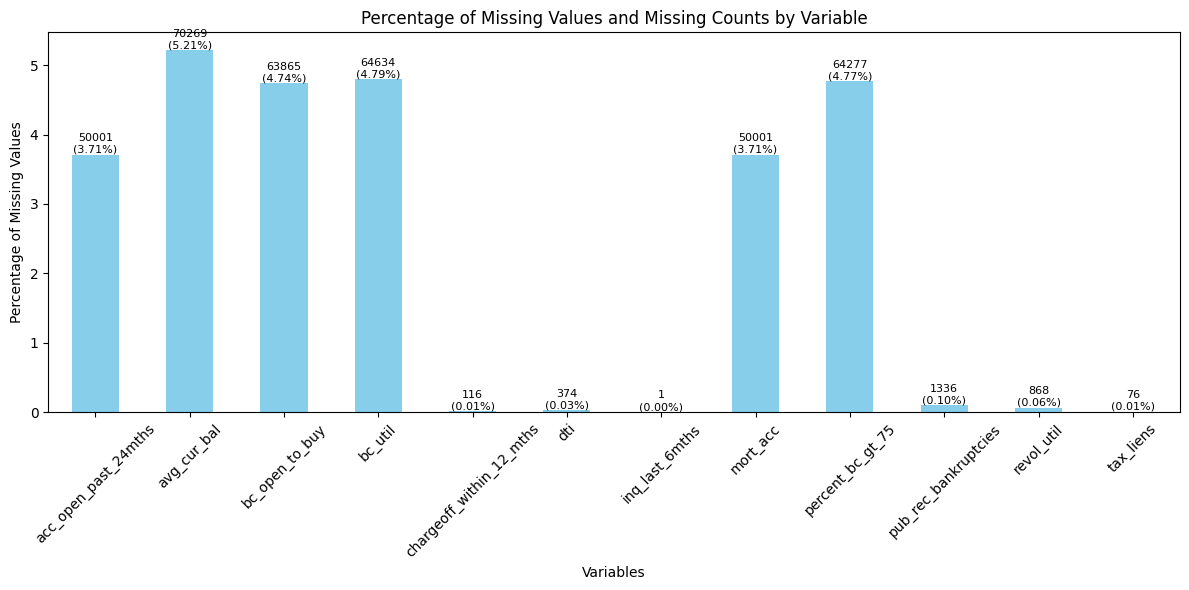

In [77]:
# Plot a bar chart showing variables with missing values only, and also the percentages of missing values
import matplotlib.pyplot as plt

# Calculate percentage of missing values for each variable
missing_percent = (lc_filtered.isnull().sum() / len(lc_filtered)) * 100
missing_counts = lc_filtered.isnull().sum()

# Filter variables with zero percentage of missing values
missing_percent_nonzero = missing_percent[missing_percent > 0]
missing_counts_nonzero = missing_counts[missing_percent > 0]

# Plot bar chart
plt.figure(figsize=(12, 6))
missing_percent_nonzero.plot(kind='bar', color='skyblue', label='Percentage of Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='center')

# Add counts as annotations on top of the bars for variables with nonzero missing values
for x, y in enumerate(missing_counts_nonzero):
    plt.text(x,missing_percent_nonzero[x], f'{y}\n({missing_percent_nonzero[x]:.2f}%)', ha='center', va='bottom', fontsize=8)
plt.title('Percentage of Missing Values and Missing Counts by Variable')
plt.tight_layout()
plt.show()


12 variables have missing values. The highest percentage of missing values is 5.21% while lowest is less than 0.01%

In [78]:
# Check the number of unique values in each columns 
# create dictionary to store column name and unique counts first
nunique_dict = {}
# iterate through all columns and print the number of unique values
for col in lc_filtered.columns:
    unique_count = lc_filtered[col].nunique()
    nunique_dict[col] = unique_count

# make the dict into dataframe
nunique_df = pd.DataFrame(list(nunique_dict.items()), columns=['Column', 'Unique Values Count'])
nunique_df.sort_values(by='Unique Values Count',ascending=True)


,Column,Unique Values Count
14,loan_status,2
3,application_type,2
23,term,2
25,verification_status,3
28,fico_score_rating,4
27,region,5
11,home_ownership,6
0,acc_now_delinq,8
7,chargeoff_within_12_mths,11
26,emp_length_int,12


In [79]:
# Extract information into a DataFrame
info_df = pd.DataFrame(lc_filtered.dtypes)
info_df.columns = ['DataType']
info_df['Variable'] = info_df.index

# Reorder the columns
info_df = info_df[['Variable', 'DataType']]

# Reset the index
info_df.reset_index(drop=True, inplace=True)

info_df

,Variable,DataType
0,acc_now_delinq,float64
1,acc_open_past_24mths,float64
2,annual_inc,float64
3,application_type,object
4,avg_cur_bal,float64
5,bc_open_to_buy,float64
6,bc_util,float64
7,chargeoff_within_12_mths,float64
8,delinq_2yrs,float64
9,delinq_amnt,float64


#### Setting up categorical and numerical variables

In [80]:
# Initialize empty lists to store numerical and categorical variable names
numerical_vars = []
categorical_vars = []

# Iterate through each column in the DataFrame
for col in lc_filtered.columns:
    # Check if the data type is numerical (int or float)
    if lc_filtered[col].dtype in ['int64', 'float64']:
        numerical_vars.append(col)
    # Otherwise, assume it's categorical
    else:
        categorical_vars.append(col)

# Create a DataFrame to display the numerical variable names
numerical_df = pd.DataFrame({'Numerical Variables': numerical_vars})
# Create a DataFrame to display the categorical variable names
categorical_df = pd.DataFrame({'Categorical Variables': categorical_vars})


### EDA

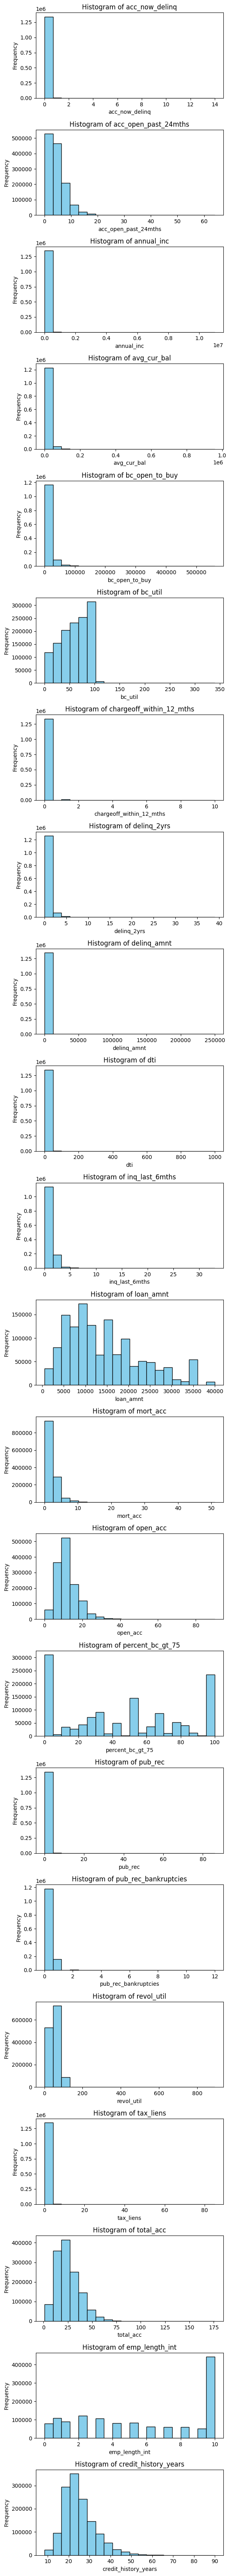

In [89]:
# Define a function to plot history for numerical variables 

import matplotlib.pyplot as plt
"""Plot histograms for numerical variables in the given DataFrame."""

def plot_histograms(dataframe, numerical_vars):
    fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=1, figsize=(6, 3*len(numerical_vars)))
    for i, var in enumerate(numerical_vars):
        ax = axes[i]
        ax.hist(dataframe[var], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogram of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_histograms(lc_filtered, numerical_vars)


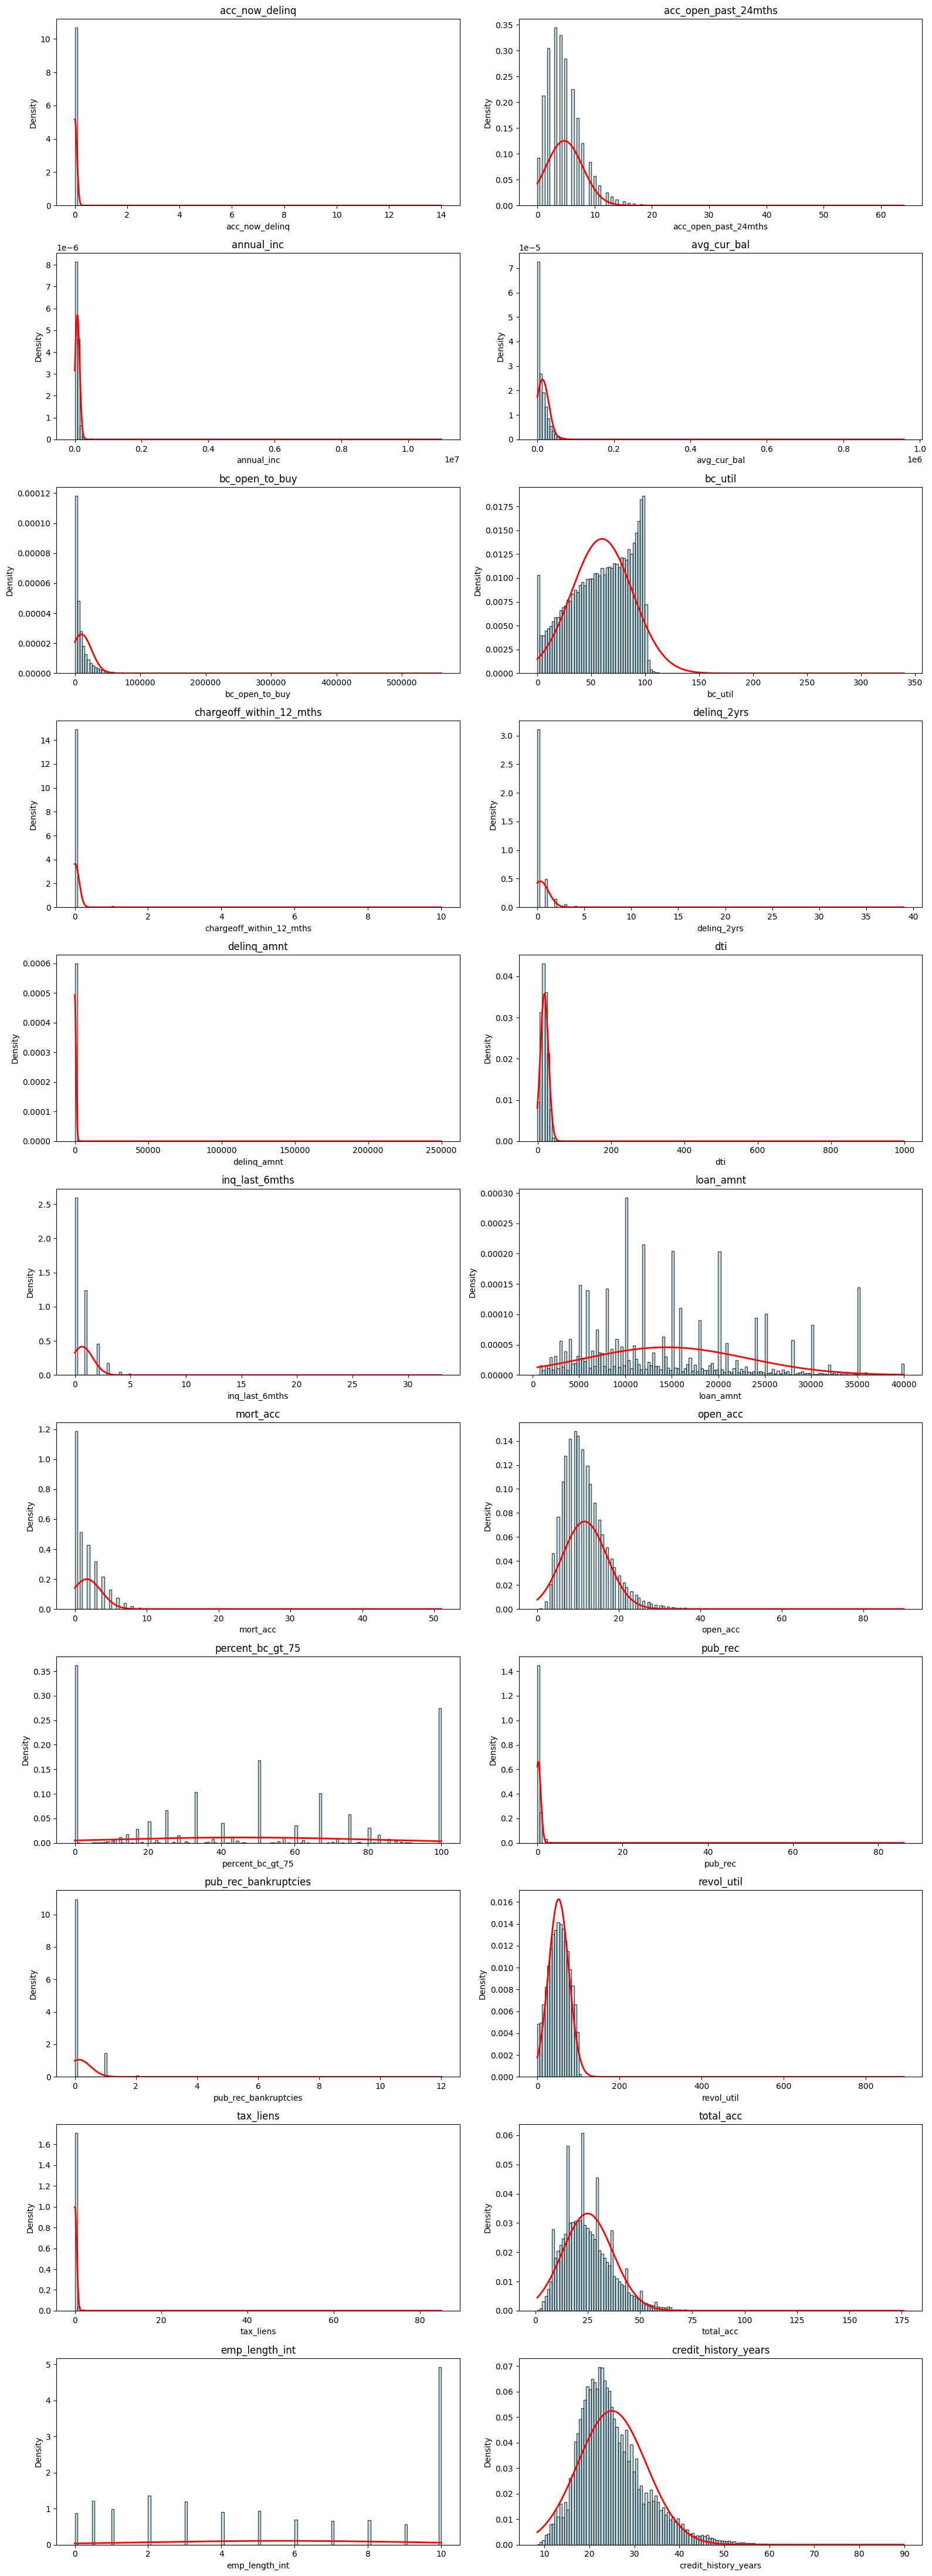

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_histograms_in_main_plot(dataframe, numerical_vars):
    num_vars = len(numerical_vars)
    num_cols = 2  # Number of columns in the main plot (adjust as needed)
    num_rows = -(-num_vars // num_cols)  # Calculate the number of rows required
    
    # Create the main plot
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))
    axes = axes.flatten()  # Flatten the array for easier indexing
    
    # Iterate over numerical variables and their corresponding subplot
    for i, var in enumerate(numerical_vars):
        ax = axes[i]  # Select the current subplot
        
        # Plot the histogram of the data
        ax.hist(dataframe[var], bins=150, density=True, color='lightblue', alpha=0.7, edgecolor='black', label='Data Distribution')
        
        # Calculate mean and standard deviation of the data
        mean = dataframe[var].mean()
        std_dev = dataframe[var].std()
        
        # Generate x values for the distribution curve
        x = np.linspace(dataframe[var].min(), dataframe[var].max(), 1000)
        # Plot the ideal normal distribution curve
        y_normal = norm.pdf(x, mean, std_dev)
        ax.plot(x, y_normal, color='red', linestyle='-', linewidth=2, label='Distribution curve')
        
        # Set subplot title and labels
        ax.set_title(f'{var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Density')
    
    # Hide any unused subplots
    for j in range(num_vars, num_cols*num_rows):
        axes[j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms_in_main_plot(lc_filtered, numerical_vars)


In [91]:
lc_filtered.describe()

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,inq_last_6mths,loan_amnt,mort_acc,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_util,tax_liens,total_acc,emp_length_int,credit_history_years
count,1.348070e+06,1.298069e+06,1.348070e+06,1.277801e+06,1.284205e+06,1.283436e+06,1.347954e+06,1.348070e+06,1.348070e+06,1.347696e+06,1.348069e+06,1.348070e+06,1.298069e+06,1.348070e+06,1.283793e+06,1.348070e+06,1.346734e+06,1.347202e+06,1.347994e+06,1.348070e+06,1.348070e+06,1.348070e+06
mean,5.038314e-03,4.692894e+00,7.623784e+04,1.348857e+04,1.018625e+04,5.993925e+01,9.044819e-03,3.176326e-01,1.486954e+01,1.827448e+01,6.622042e-01,1.440922e+04,1.670769e+00,1.159045e+01,4.515561e+01,2.150497e-01,1.343628e-01,5.181200e+01,5.202842e-02,2.497599e+01,5.654991e+00,2.500813e+01
std,7.710147e-02,3.186910e+00,6.992283e+04,1.628961e+04,1.535073e+04,2.829319e+01,1.096132e-01,8.777443e-01,8.087130e+02,1.115549e+01,9.600710e-01,8.716089e+03,2.000441e+00,5.474680e+00,3.600722e+01,6.014718e-01,3.777969e-01,2.452979e+01,3.975221e-01,1.200356e+01,3.788428e+00,7.608993e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,5.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.427105e+00
25%,0.000000e+00,2.000000e+00,4.575086e+04,3.101000e+03,1.464000e+03,3.830000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.179000e+01,0.000000e+00,7.975000e+03,0.000000e+00,8.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,3.340000e+01,0.000000e+00,1.600000e+01,2.000000e+00,1.975907e+01
50%,0.000000e+00,4.000000e+00,6.500000e+04,7.407000e+03,4.700000e+03,6.320000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.761000e+01,0.000000e+00,1.200000e+04,1.000000e+00,1.100000e+01,4.290000e+01,0.000000e+00,0.000000e+00,5.220000e+01,0.000000e+00,2.300000e+01,6.000000e+00,2.359206e+01
75%,0.000000e+00,6.000000e+00,9.000000e+04,1.871700e+04,1.238300e+04,8.480000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.405000e+01,1.000000e+00,2.000000e+04,3.000000e+00,1.400000e+01,7.500000e+01,0.000000e+00,0.000000e+00,7.070000e+01,0.000000e+00,3.200000e+01,1.000000e+01,2.892813e+01
max,1.400000e+01,6.400000e+01,1.099920e+07,9.580840e+05,5.599120e+05,3.396000e+02,1.000000e+01,3.900000e+01,2.499250e+05,9.990000e+02,3.300000e+01,4.000000e+04,5.100000e+01,9.000000e+01,1.000000e+02,8.600000e+01,1.200000e+01,8.923000e+02,8.500000e+01,1.760000e+02,1.000000e+01,8.992745e+01


Visualise the categorical variables

In [94]:
# Create function to plot categorical variables

import matplotlib.pyplot as plt
def plot_categorical(dataframe, categorical_vars):
    num_vars = len(categorical_vars)
    num_cols = 3 # Number of columns in the main plot 
    num_rows = -(-num_vars // num_cols)  # Calculate the number of rows required
    
    # Create the main plot
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 4*num_rows))
    axes = axes.flatten()  # Flatten the array for easier indexing
    
    # Iterate over categorical vars and their corresponding subplot
    for i, var in enumerate(categorical_vars):
        ax = axes[i]  # Select the current subplot
        
        category_counts = dataframe[var].value_counts() # Count the frequency of each category
        
        # Plot the bar chart
        category_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black',fontsize=8)
        
        ax.set_title(f'{var}',fontsize=10, fontstyle='normal') # Set subplot title and labels
        ax.set_xlabel('Categories', fontsize=8)
        ax.set_ylabel('Count',fontsize=8)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=6)
    
    for j in range(num_vars, num_cols*num_rows): # Hide any unused subplots
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

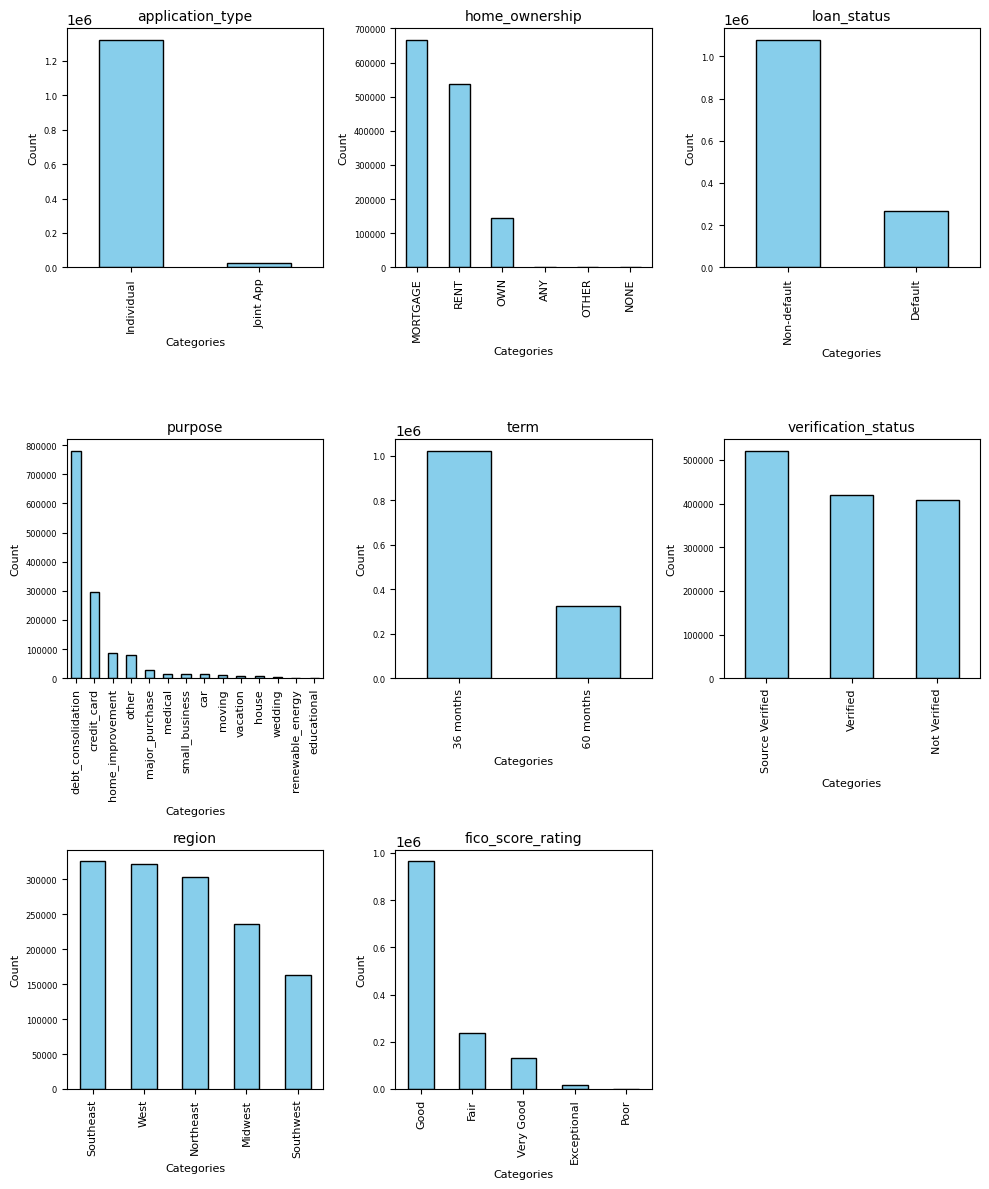

In [95]:
plot_categorical(lc_filtered, categorical_vars)

Since most of the distribution of data in the numerical variables are not normally distributed, median will be used in the imputation in the next step as it will not significantly affect the data distribution. Furthermore, median is also more robust to outliers compared to the mean, it is often preferred when the data contains outliers or when the distribution is skewed. The presence of the outliers will not be removed from the dataset as any outliers will have important existence in the patterns.No missing values are found in the categorical variables. However, imputation using mode will still be carried out.

Further data transformation will need to be carried out on some of the categorical after the EDA.
Purpose, home_ownership and verfication_status will need to undergo some feature engineering and transformation as there are too many categories with little counts only. Group the infrequent categories into one category ('Other' category).

Combine all the categories except 'debt_consolidation', 'credit_card' and 'home_improvement' into 'other' category

In [69]:
lc_filtered['purpose'].value_counts()
# Combine all the categories except 'debt_consolidation', 'credit_card' and 'home_improvement' into 'other' category

purpose
debt_consolidation    781441
credit_card           295625
home_improvement       87721
other                  78273
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
house                   7298
wedding                 2350
renewable_energy         936
educational              423
Name: count, dtype: int64

In [70]:
lc_filtered['home_ownership'].value_counts()

home_ownership
MORTGAGE    666845
RENT        535682
OWN         145026
ANY            286
OTHER          182
NONE            49
Name: count, dtype: int64

In [71]:
lc_filtered['verification_status'].value_counts()

verification_status
Source Verified    521579
Verified           418979
Not Verified       407512
Name: count, dtype: int64

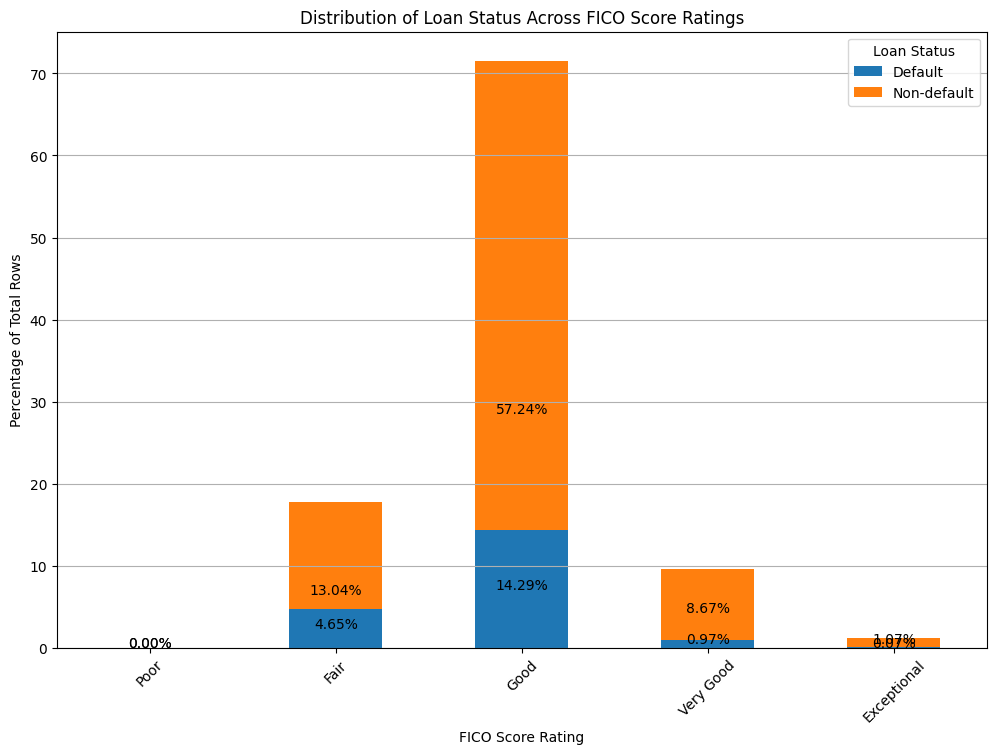

In [111]:
import matplotlib.pyplot as plt

# Group the data by fico_score_rating and loan_status, and count the occurrences
grouped_data = lc_filtered.groupby(['fico_score_rating', 'loan_status']).size().unstack()

# Calculate the percentage of each category relative to the overall count of rows
total_rows = len(lc_filtered)
percentage_data = grouped_data.apply(lambda x: x / total_rows * 100, axis=0)

# Plot the bar chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Loan Status Across FICO Score Ratings')
plt.xlabel('FICO Score Rating')
plt.ylabel('Percentage of Total Rows')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.grid(axis='y')

# Add percentage labels on top of each bar for each FICO score rating category
for i, category in enumerate(grouped_data.index):
    for j, value in enumerate(grouped_data.columns):
        percentage = percentage_data.loc[category, value]
        ax.text(i, percentage / 2, f'{percentage:.2f}%', ha='center', color='black')

plt.show()


### Imputation of missing values in the variables (categorical and numerical)

In [112]:
# First make a backup of the filtered dataset
import pandas as pd
lc_imputed=lc_filtered.copy()

In [113]:
# Imputation of missing values in categorical and numerical variables

# Impute missing values in numerical columns with median
for var in numerical_vars:
    lc_imputed[var] = lc_imputed[var].fillna(lc_imputed[var].median())

# Impute missing values in categorical columns with mode
for var in categorical_vars:
    lc_imputed[var] = lc_imputed[var].fillna(lc_imputed[var].mode())

In [114]:
lc_imputed.isnull().sum()

acc_now_delinq              0
acc_open_past_24mths        0
annual_inc                  0
application_type            0
avg_cur_bal                 0
bc_open_to_buy              0
bc_util                     0
chargeoff_within_12_mths    0
delinq_2yrs                 0
delinq_amnt                 0
dti                         0
home_ownership              0
inq_last_6mths              0
loan_amnt                   0
loan_status                 0
mort_acc                    0
open_acc                    0
percent_bc_gt_75            0
pub_rec                     0
pub_rec_bankruptcies        0
purpose                     0
revol_util                  0
tax_liens                   0
term                        0
total_acc                   0
verification_status         0
emp_length_int              0
region                      0
fico_score_rating           0
credit_history_years        0
dtype: int64

### Data transformation and feature engineering on 'verification_status,'purpose' and 'home_ownership'

In [115]:
categorical_feature_eng = ['verification_status','purpose','home_ownership']
for cate in categorical_feature_eng:
    print(lc_filtered[cate].value_counts())
    print('\n')

verification_status
Source Verified    521579
Verified           418979
Not Verified       407512
Name: count, dtype: int64


purpose
debt_consolidation    781441
credit_card           295625
home_improvement       87721
other                  78273
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
house                   7298
wedding                 2350
renewable_energy         936
educational              423
Name: count, dtype: int64


home_ownership
MORTGAGE    666845
RENT        535682
OWN         145026
ANY            286
OTHER          182
NONE            49
Name: count, dtype: int64




In [116]:
# First group categories in home_ownership var
other_home_ownership = ['NONE','ANY']
lc_imputed.loc[lc_imputed['home_ownership'].isin(other_home_ownership), 'home_ownership'] = 'OTHER'

# Next, merge source verified with verified in verification_status
lc_imputed['verification_status'] = lc_imputed['verification_status'].replace('Source Verified', 'Verified')

# Lastly, purpose of the loan application
major_purchase = ['educational','wedding','renewable_energy','small_business','car','medical','vacation']
housing = ['home_improvement','house','moving']

lc_imputed['purpose'] = lc_imputed['purpose'].replace(major_purchase, 'major_purchase')
lc_imputed['purpose'] = lc_imputed['purpose'].replace(housing, 'housing')

### Data Normalization - Box cox transformation and min-max normalisation

The prior EDA  step shows that the numerical variables have varying scales and this will impact the model training and performance. 

Normalisation is performed when the numerical variables in the dataset have different scales of values. It is done to  ensure that the data contributes equally to the analysis and during the model training, preventing features with larger magnitude from domaninating. In some machine learning algorithms such as Support Vector Machine (SVM) are sensitive the scoale of the input variables or features. Thus, by performing data normalisation, it reduces the biasness of algorithm towards features with large scales. As for tree-based algorithm such LightGBM, normalisation isnt required but this step will still be performed for the benefits of other proposed algorithms in the study.

Reason for using min max:

The distribution of the data is not normally distributed. Min-max normalization doesn't assume any specific distribution of data.
The original scale of the data will be preserved as Min-max normalization can maintain the relative distances between data points in the variables, ensuring that the structure of original data is preserved.


Box-cox transformation is first performed to solve the skewness issue, then min-max normalization is performed again to produce 0-1 scale

In [120]:
# Perform the box-cox transformation on the numerical variables
from sklearn.preprocessing import PowerTransformer
lc_boxcox = lc_imputed.copy()

# Add a constant value to ensure all data points are positive
lc_boxcox[numerical_vars] += np.abs(lc_boxcox[numerical_vars].min()) + 1

# Initialize the PowerTransformer object
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)  # Use 'box-cox' method

# Fit the transformer to your numerical variables and transform them
lc_boxcox[numerical_vars] = boxcox_transformer.fit_transform(lc_boxcox[numerical_vars])

In [121]:
# Function to compare the plot before and after box-cox transformation on numerical variables

def plot_distribution_comparison(original_data, transformed_data, var_name, process):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(original_data, bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Original Distribution of {var_name}')
    axes[0].set_xlabel(var_name)
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(transformed_data, bins=30, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Distribution after {process} of {var_name}')
    axes[1].set_xlabel(f'{var_name} + {process}')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

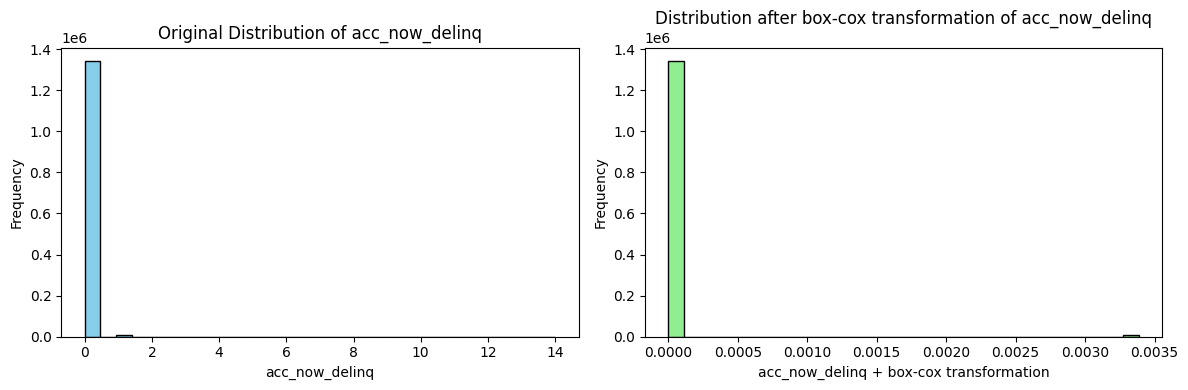

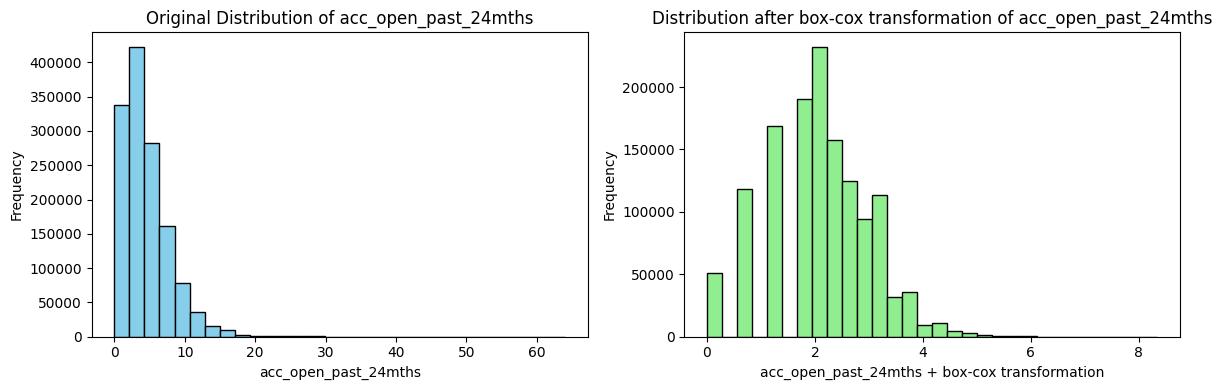

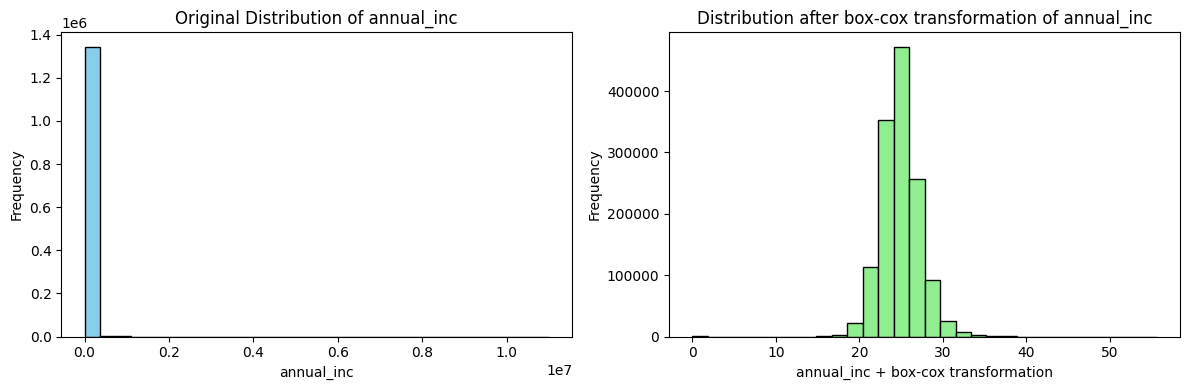

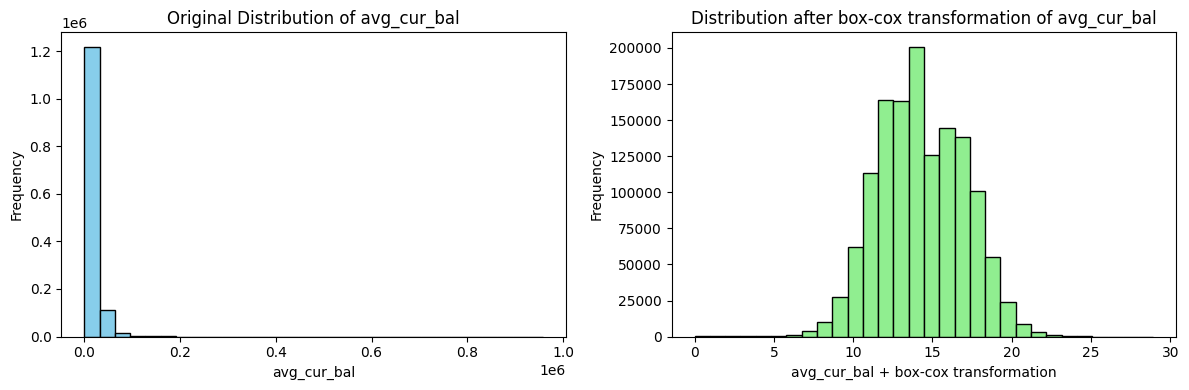

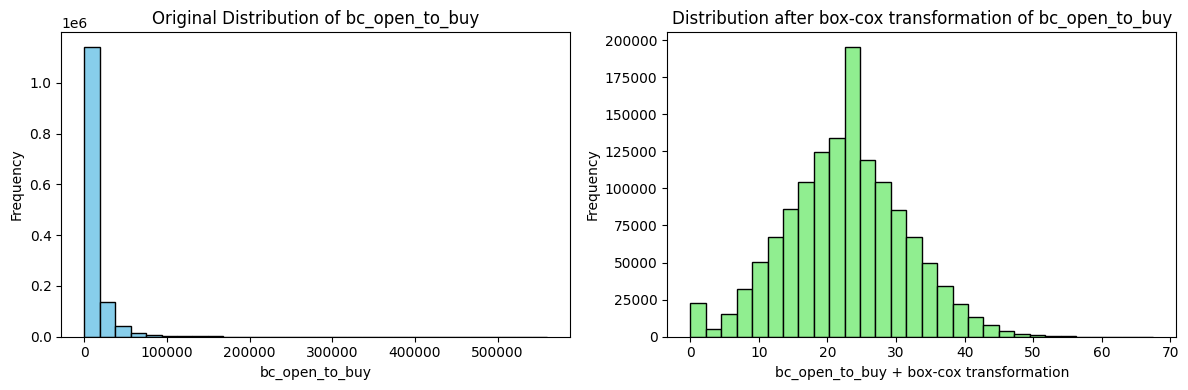

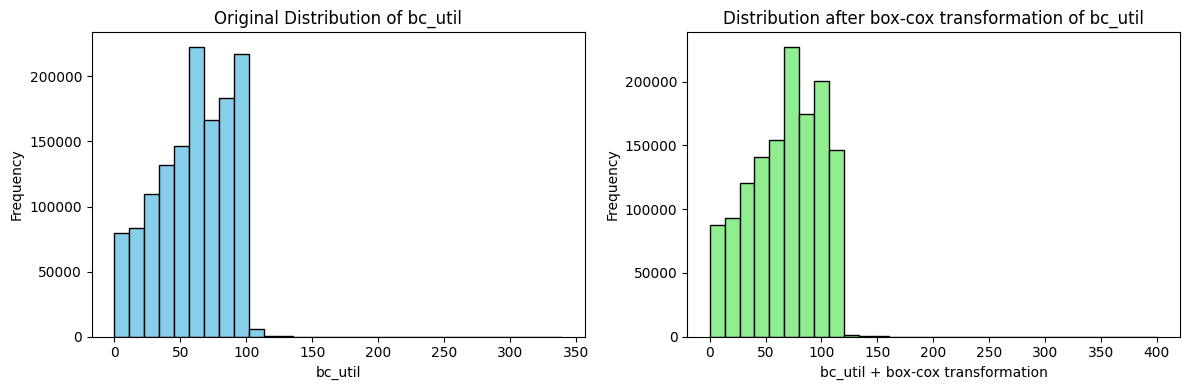

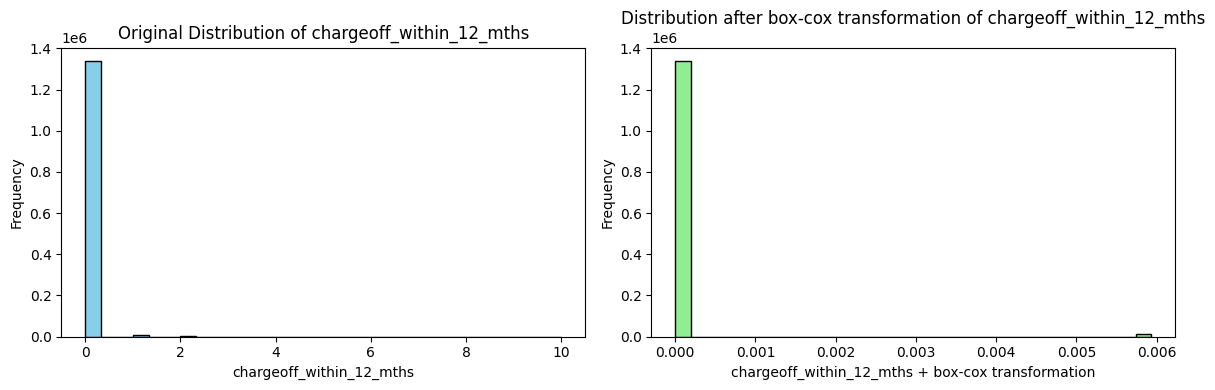

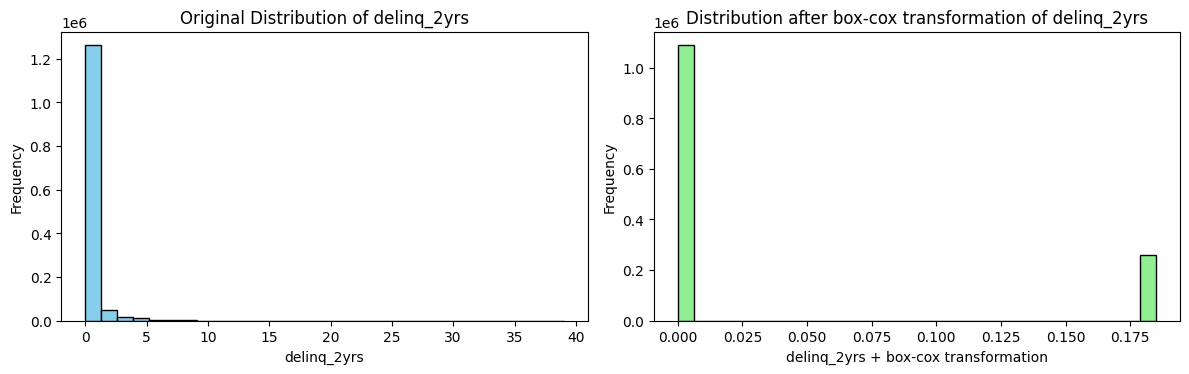

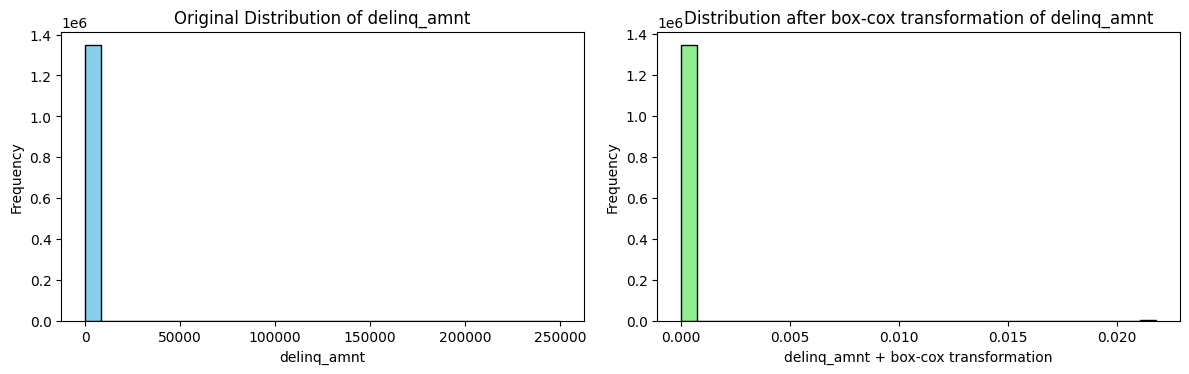

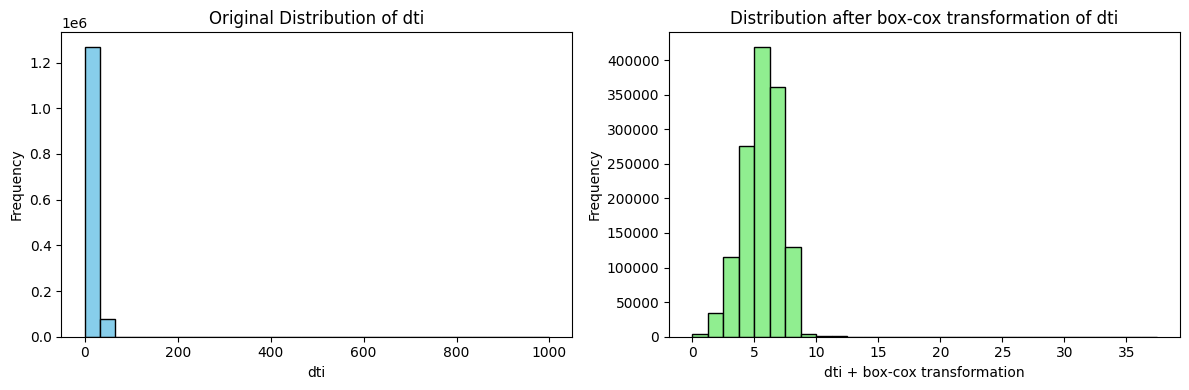

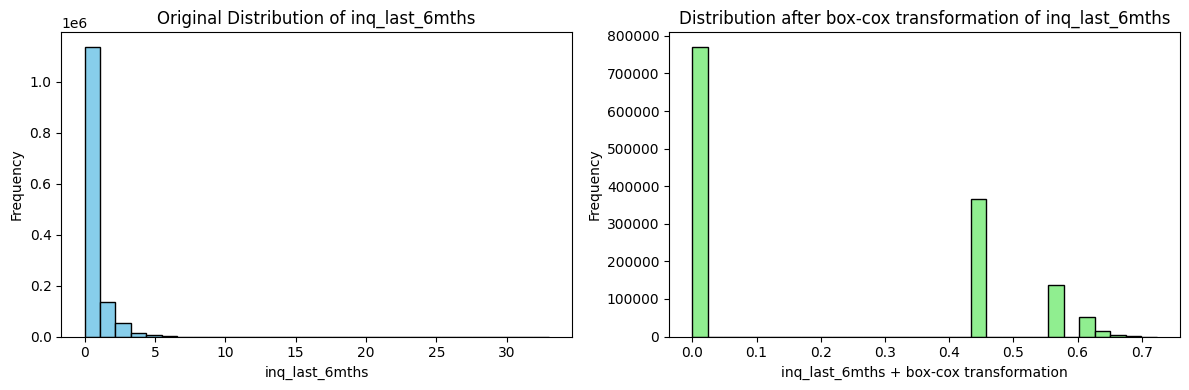

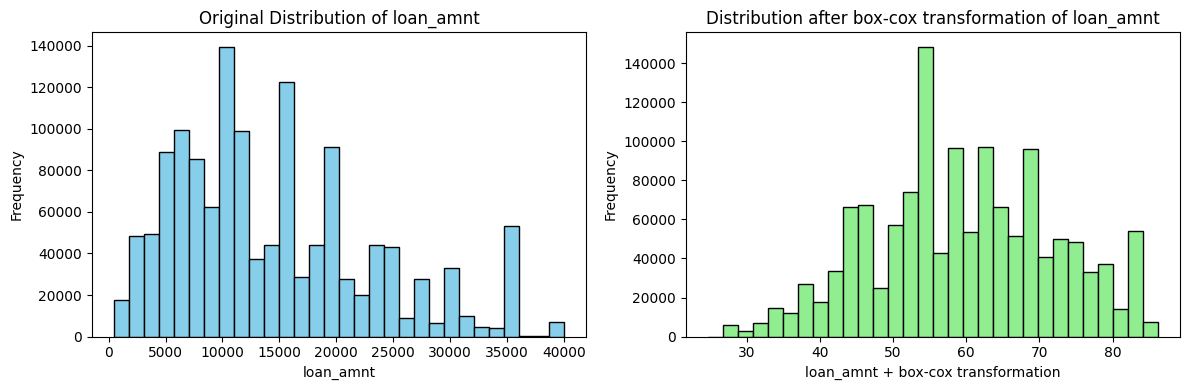

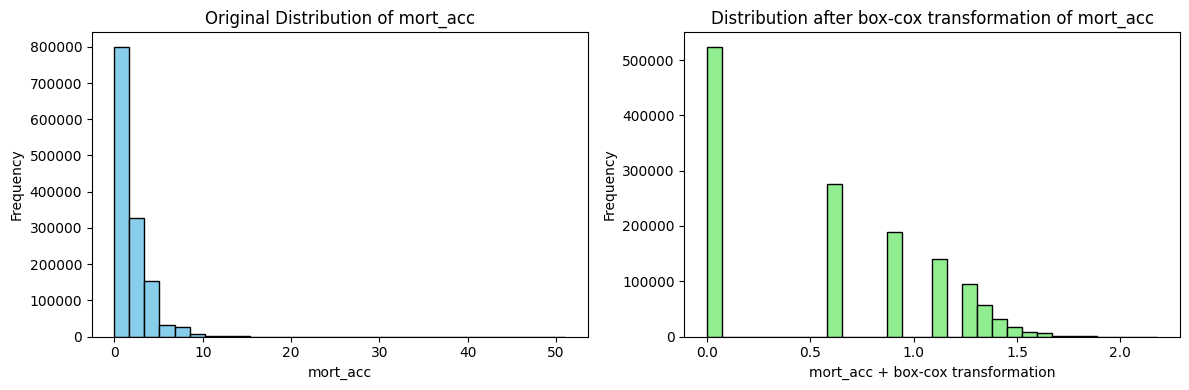

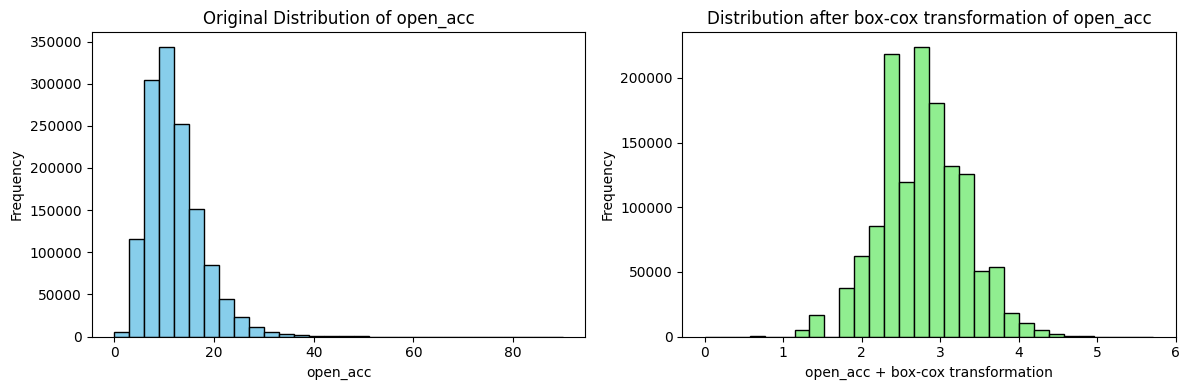

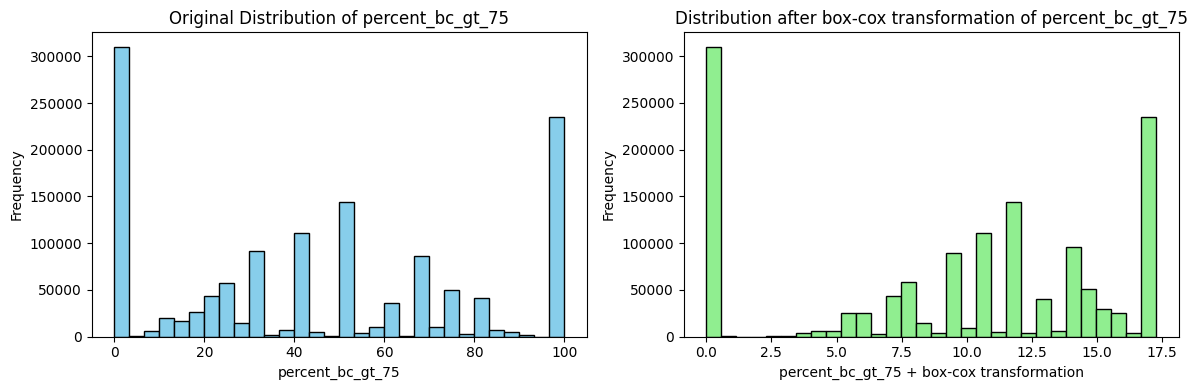

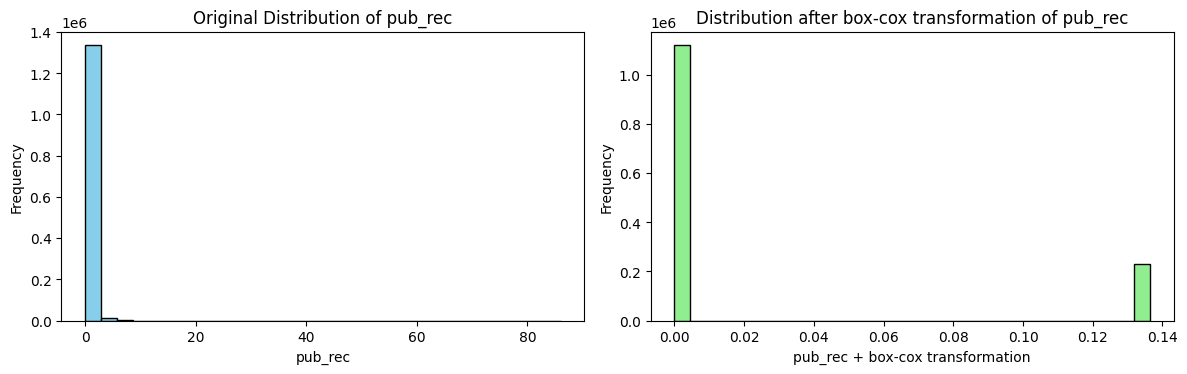

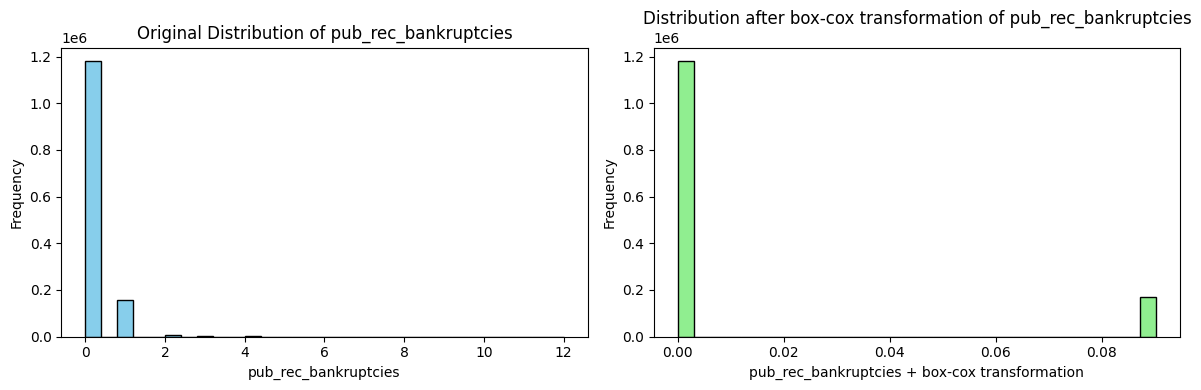

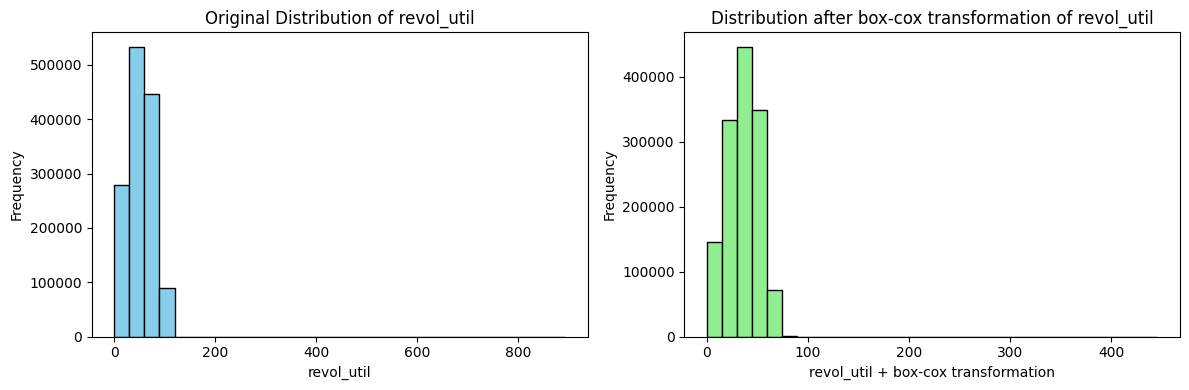

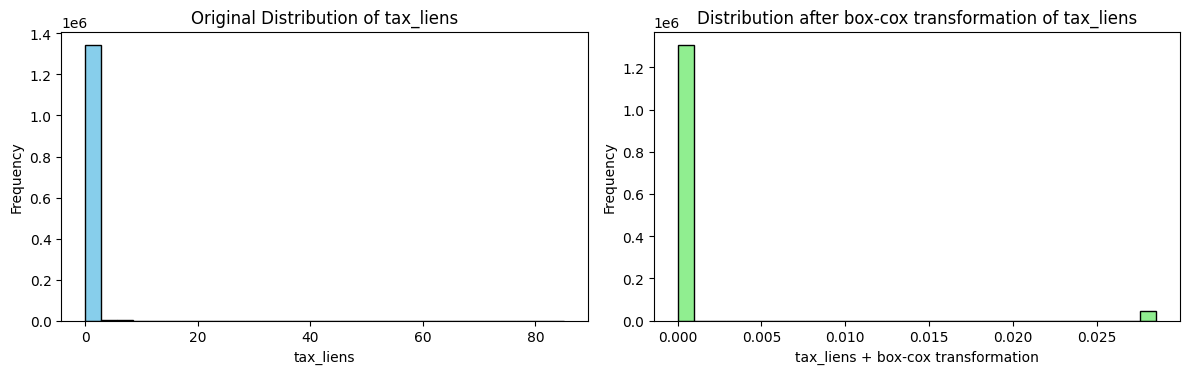

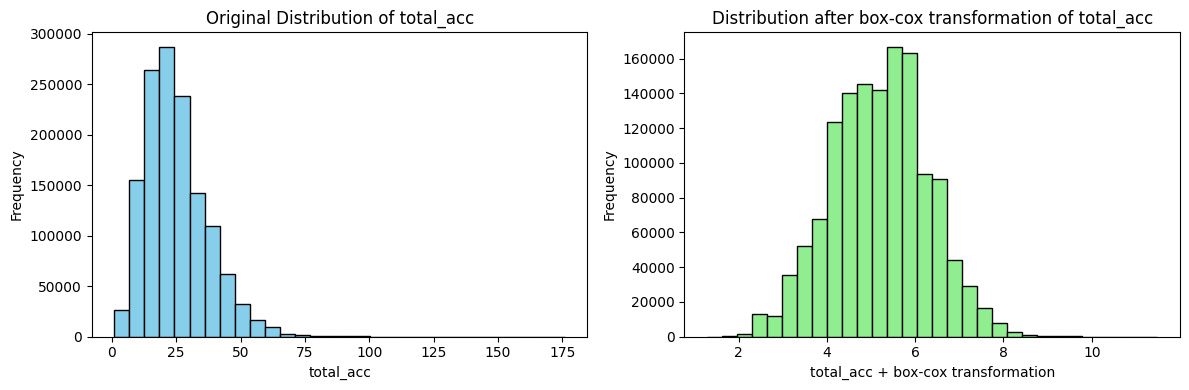

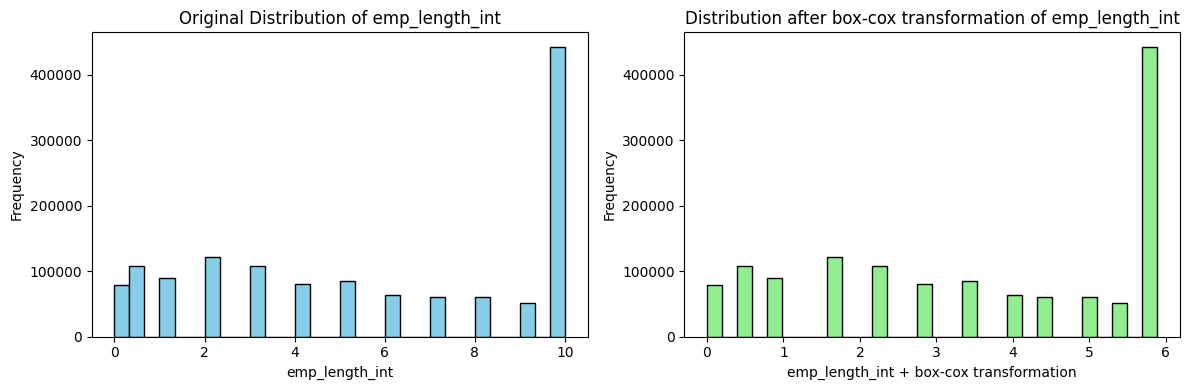

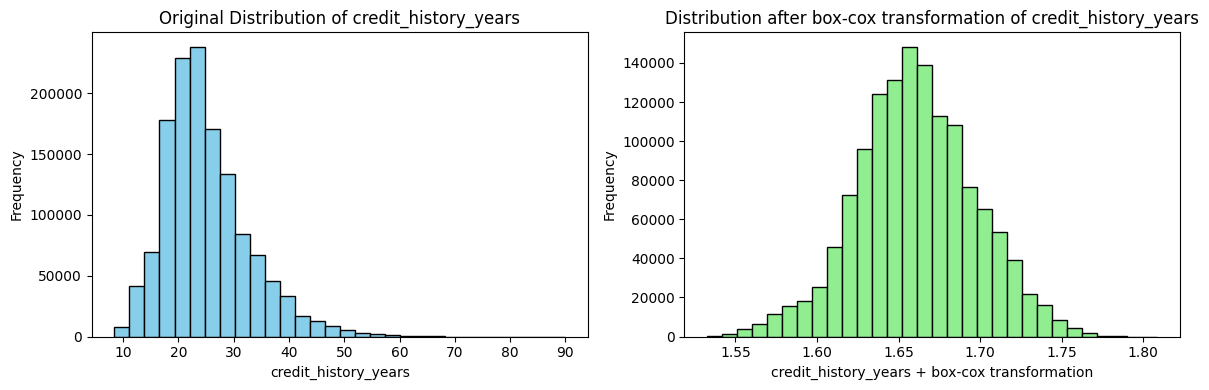

In [122]:
# Plot the comparison for all the numerical vars
for var in numerical_vars:
    plot_distribution_comparison(lc_imputed[var], lc_boxcox[var], var, 'box-cox transformation')

In [125]:
# Normalize the data using min max normalization
from sklearn.preprocessing import MinMaxScaler
# Make a copy of the original dataset
lc_minmax_norm = lc_boxcox.copy()

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
lc_minmax_norm[numerical_vars] = scaler.fit_transform(lc_minmax_norm[numerical_vars])

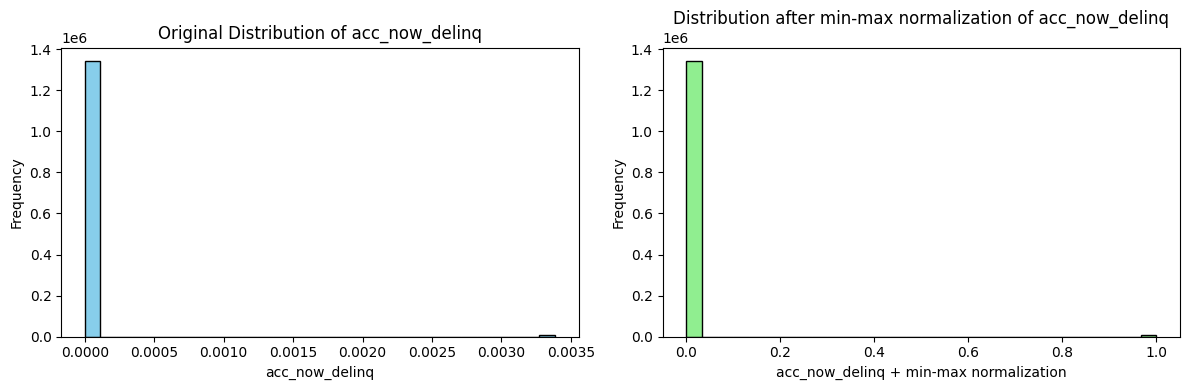

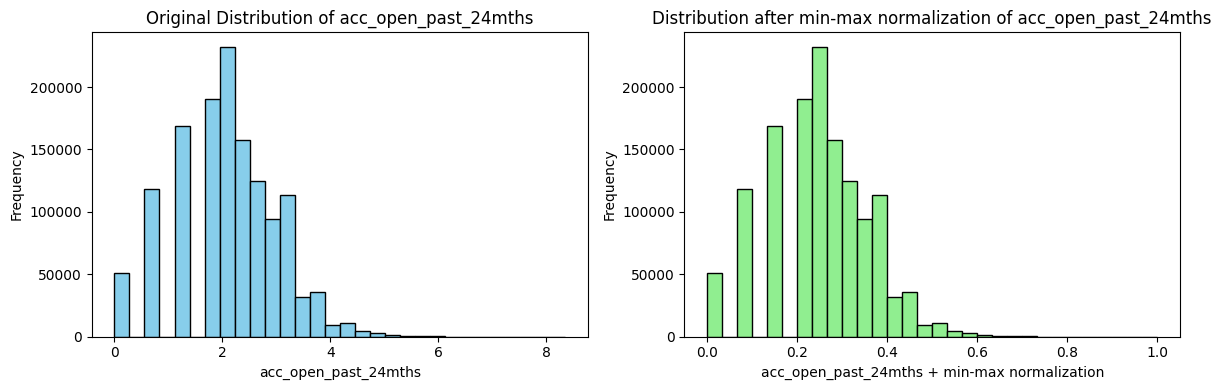

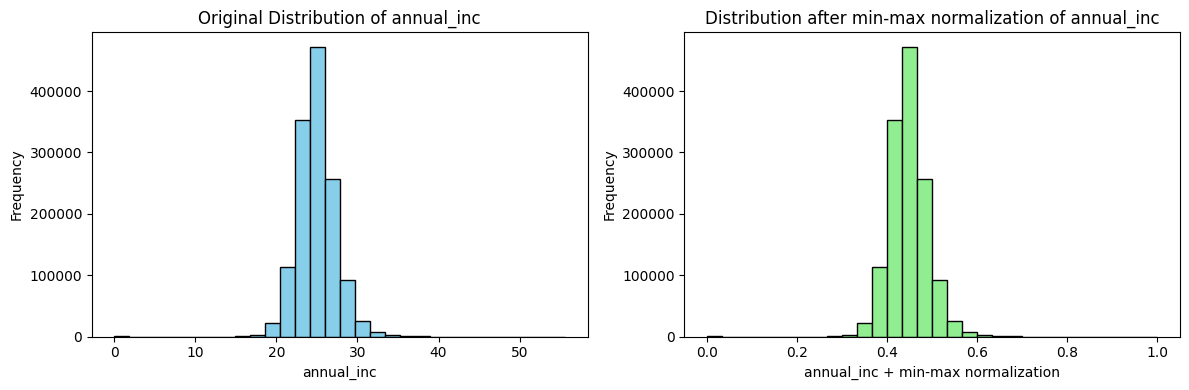

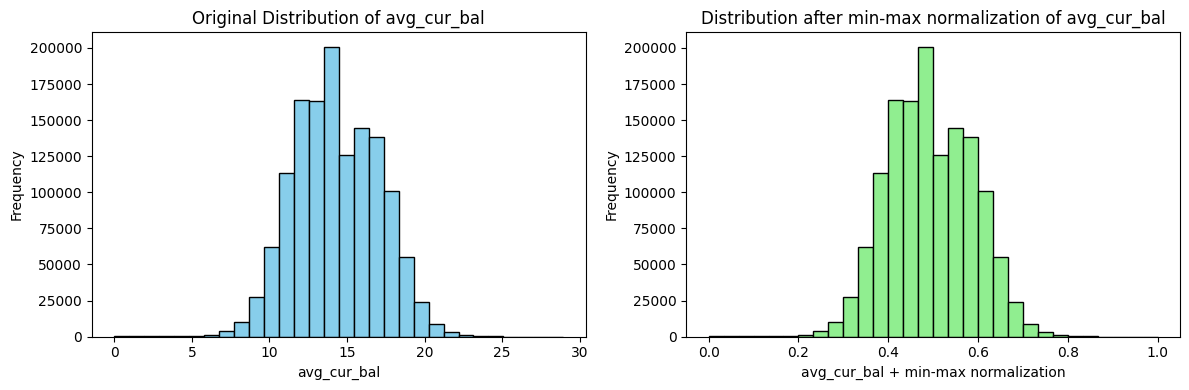

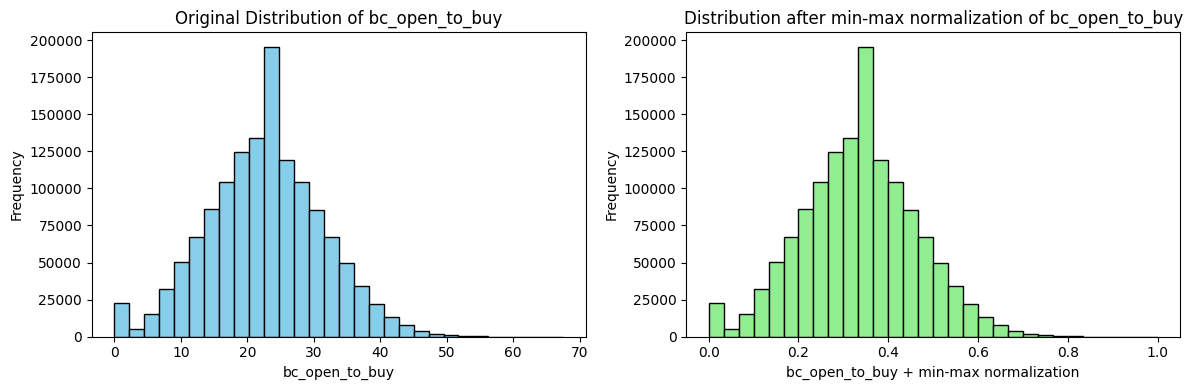

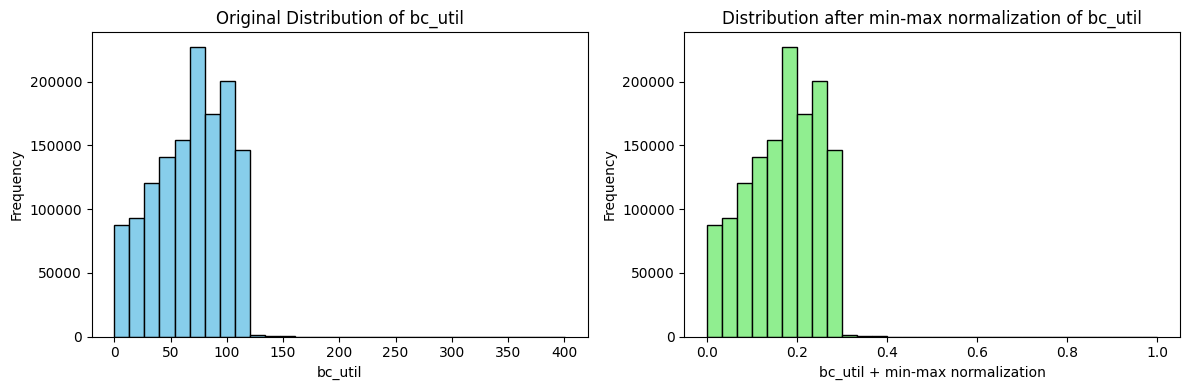

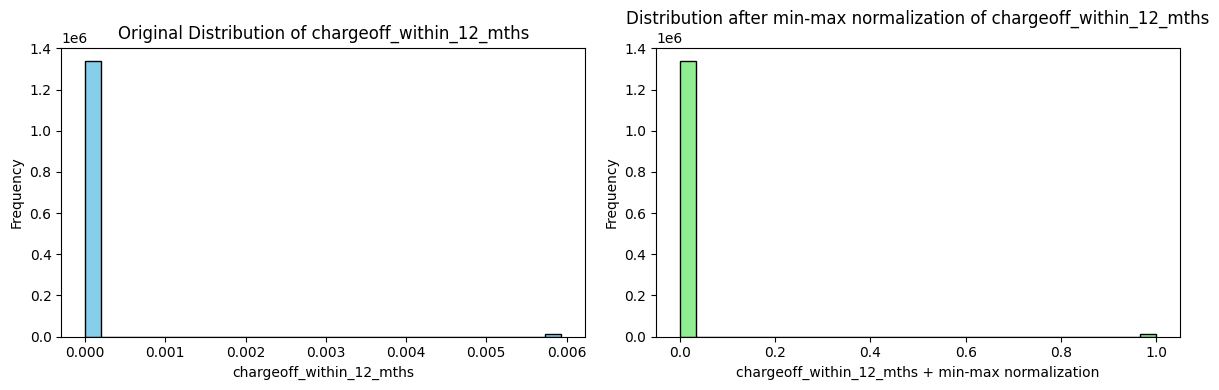

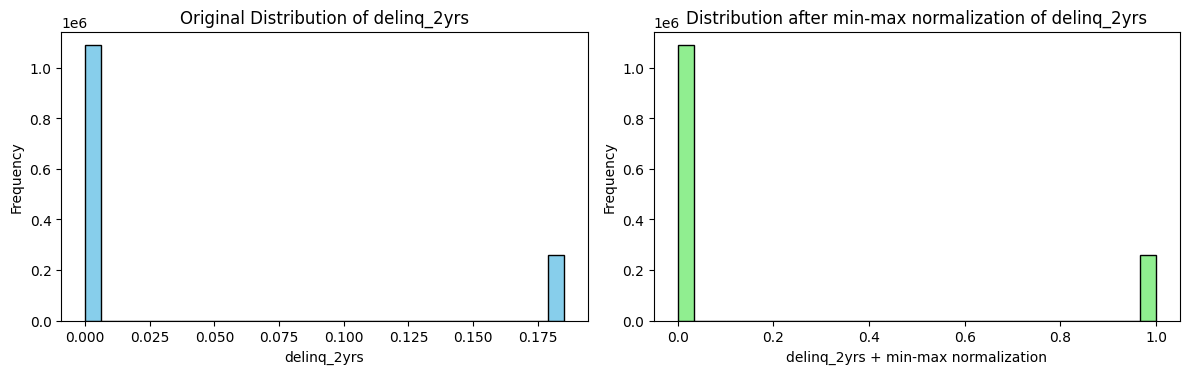

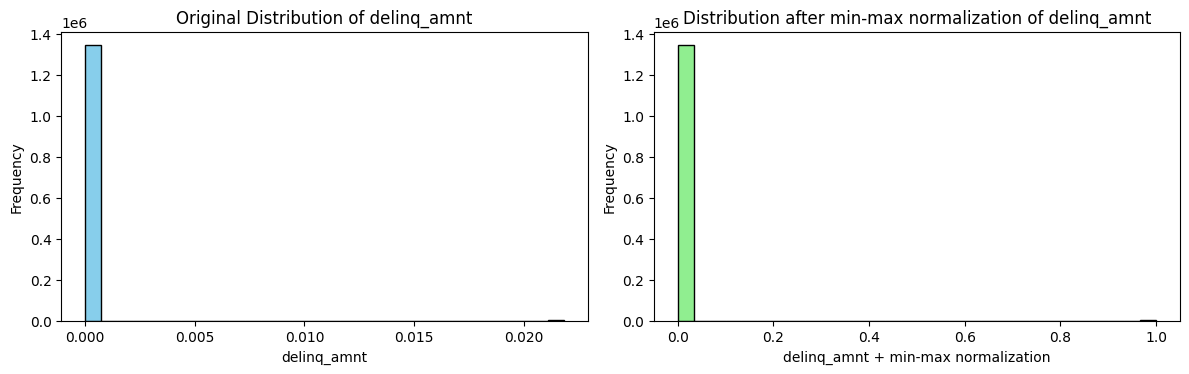

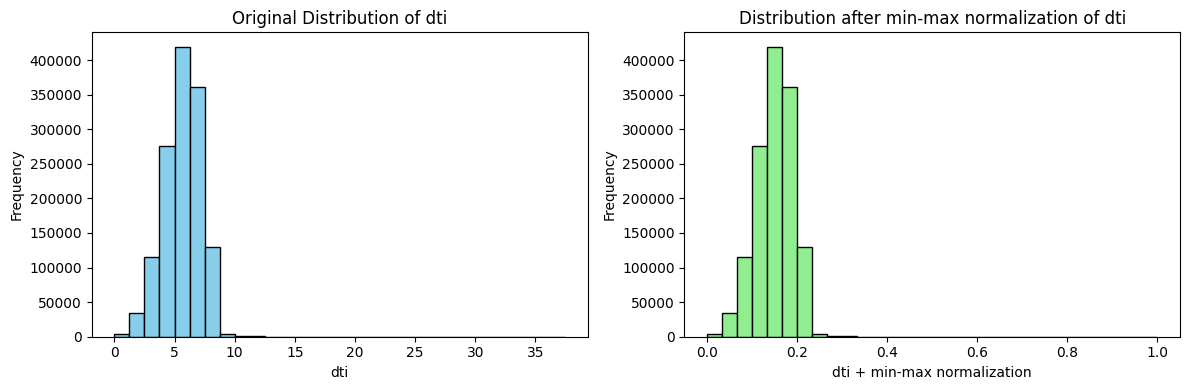

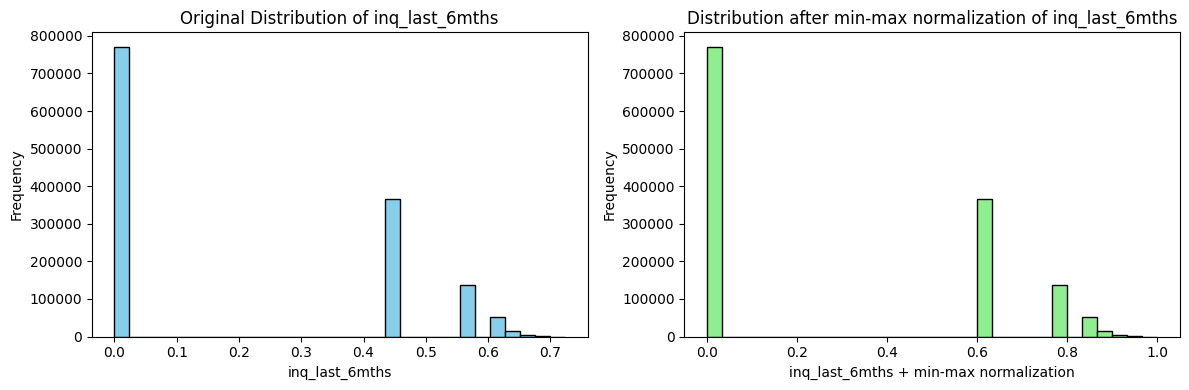

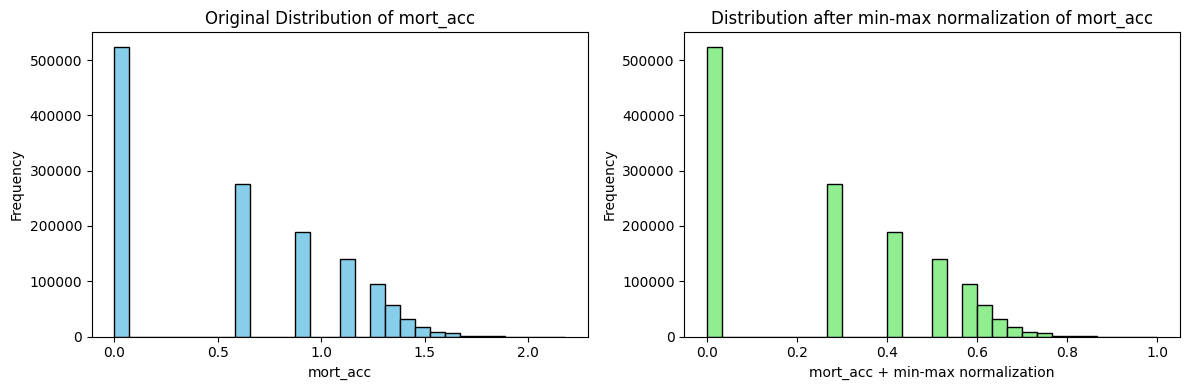

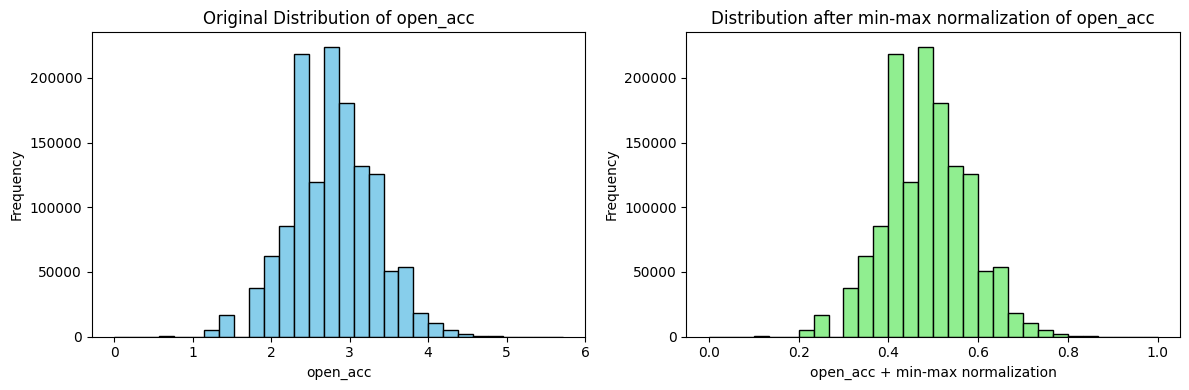

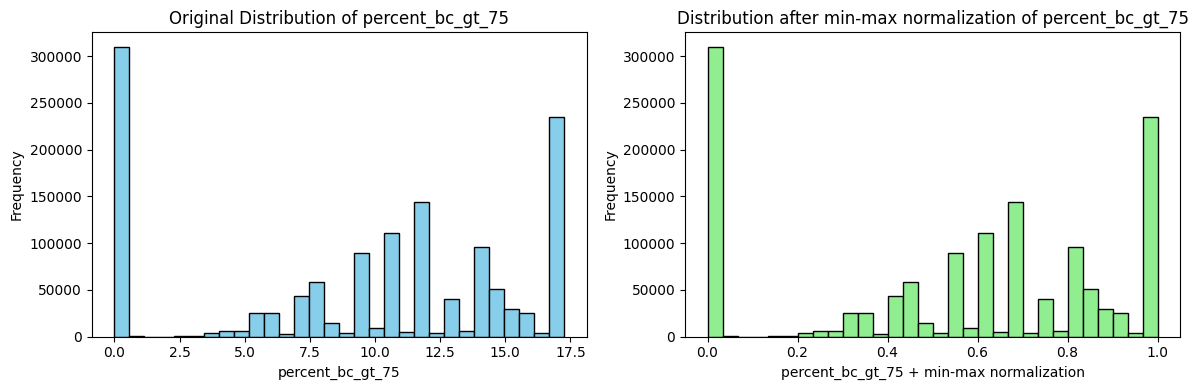

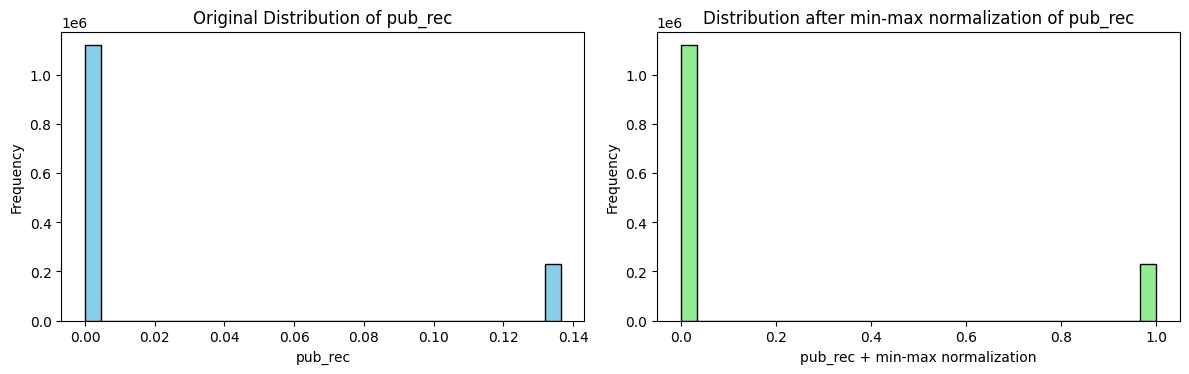

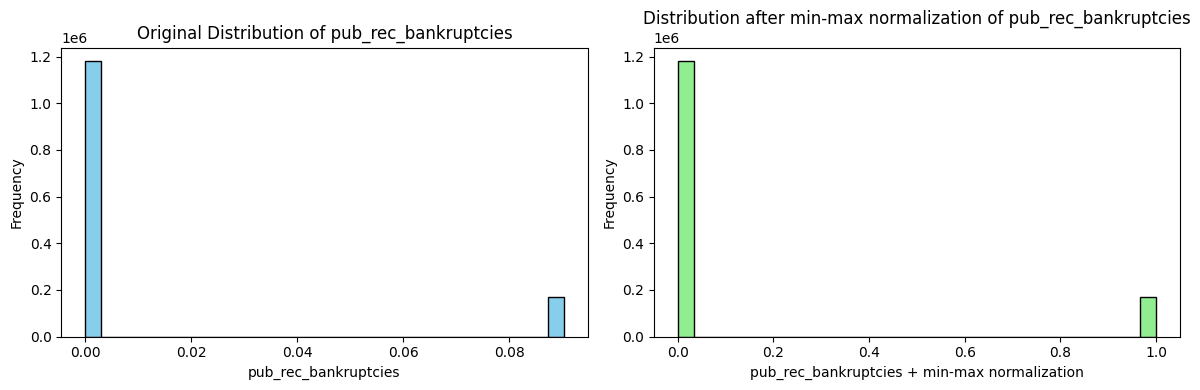

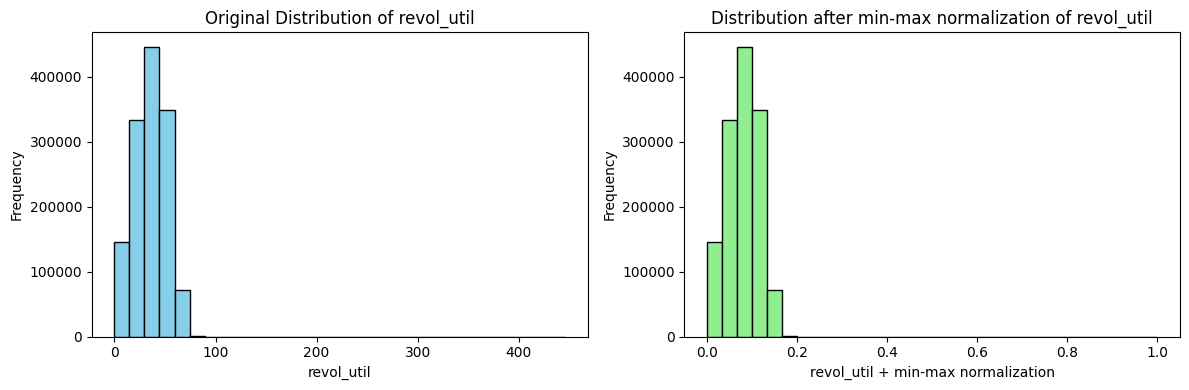

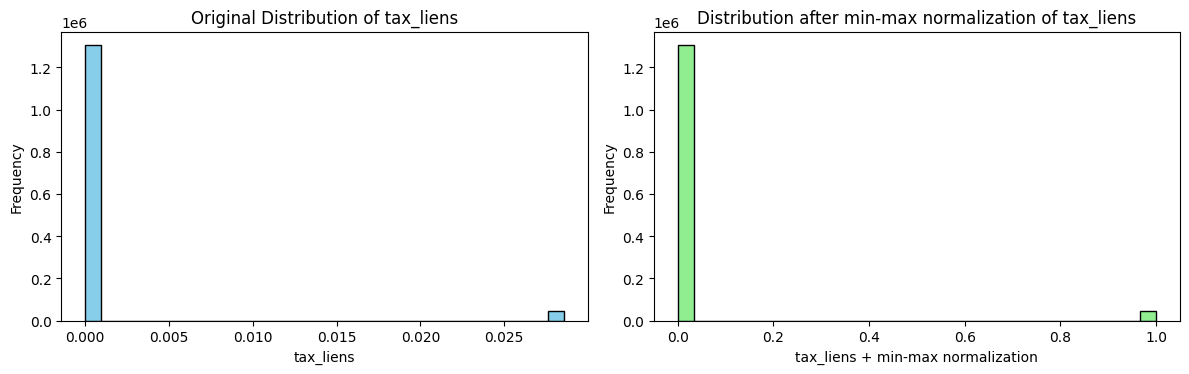

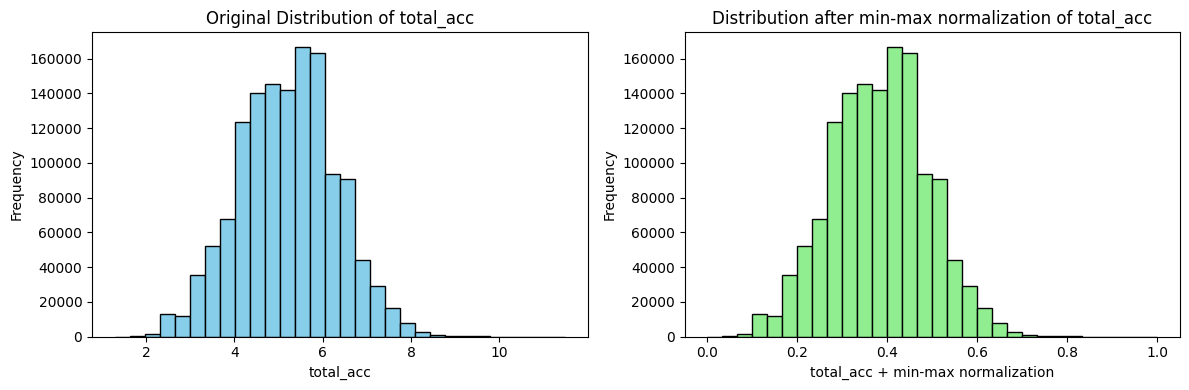

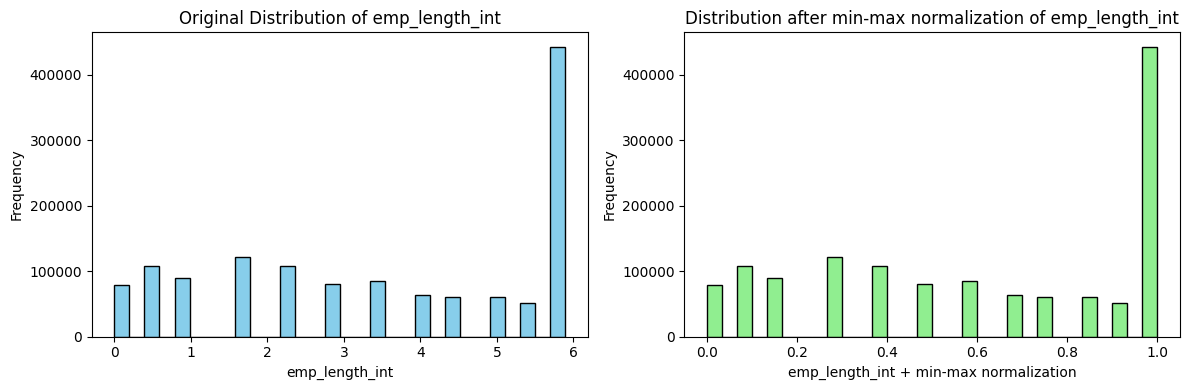

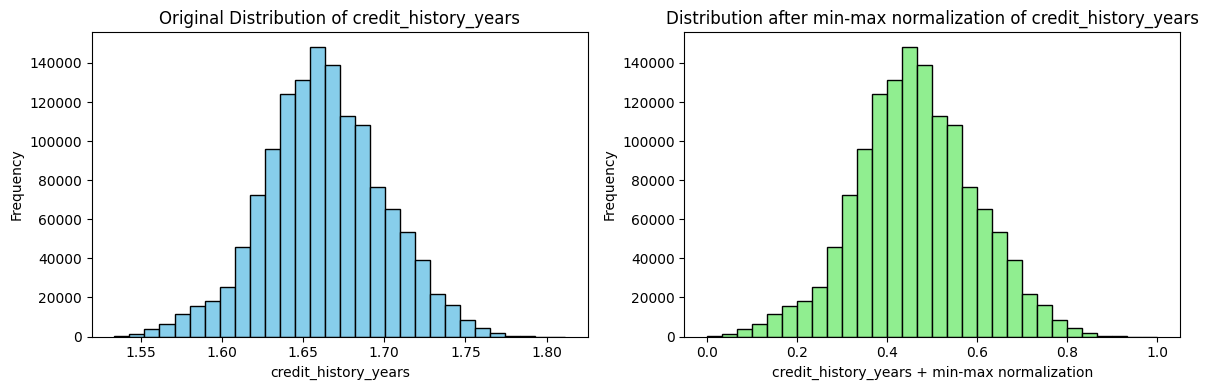

In [123]:
# Plot the comparison for all the numerical vars after min max norm
for var in numerical_vars:
    plot_distribution_comparison(lc_boxcox[var], lc_minmax_norm[var], var,'min-max normalization')

### Encode categorical and target variable

In [129]:
# First encode the target variable

# Create a dictionary to map original labels to encoded labels
label_mapping = {'Non-default': 0, 'Default': 1}
# Map the original labels to the encoded labels
lc_minmax_norm['loan_status_encoded'] = lc_minmax_norm['loan_status'].map(label_mapping)

print(lc_minmax_norm['loan_status_encoded'].value_counts())  # Check the distribution of encoded labels

loan_status_encoded
0    1078713
1     269357
Name: count, dtype: int64


In [130]:
# Drop original 'loan_status'
lc_minmax_norm.drop('loan_status', axis=1,inplace=True)

In [144]:
# Select categorical variables to encode (exclude loan_status)
categorical_cols=['application_type','home_ownership', 
                  'purpose', 'region', 'verification_status',
                  'fico_score_rating','term']

In [145]:
# Apply one-hot encoding to the categorical variables
lc_encoded = pd.get_dummies(lc_minmax_norm, columns=categorical_cols)

# Display the encoded dataset
lc_encoded.head()


,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_2yrs,delinq_amnt,dti,inq_last_6mths,loan_amnt,mort_acc,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_util,tax_liens,total_acc,emp_length_int,credit_history_years,loan_status_encoded,application_type_Individual,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_housing,purpose_major_purchase,purpose_other,region_Midwest,region_Northeast,region_Southeast,region_Southwest,region_West,verification_status_Not Verified,verification_status_Verified,fico_score_rating_Poor,fico_score_rating_Fair,fico_score_rating_Good,fico_score_rating_Very Good,fico_score_rating_Exceptional,term_ 36 months,term_ 60 months
0,0.0,0.248094,0.433349,0.578351,0.249531,0.101955,0.0,0.000000,0.0,0.086067,0.618376,0.253553,0.283514,0.404760,0.000000,0.0,0.0,0.049236,0.0,0.268419,1.000000,0.396520,0,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
1,0.0,0.248094,0.445899,0.512326,0.603578,0.073563,0.0,0.976393,0.0,0.146052,0.897101,0.798475,0.569463,0.645393,0.221509,0.0,0.0,0.033292,0.0,0.500837,1.000000,0.471415,0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
2,0.0,0.316950,0.443530,0.617581,0.291117,0.155166,0.0,0.000000,0.0,0.118487,0.000000,0.719757,0.616530,0.376128,0.684286,0.0,0.0,0.086945,0.0,0.330217,1.000000,0.458700,0,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
4,0.0,0.421126,0.483042,0.604967,0.331008,0.217376,0.0,0.976393,0.0,0.184683,0.857399,0.508294,0.654121,0.512195,0.757183,0.0,0.0,0.098267,0.0,0.479983,0.386007,0.498642,0,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True
5,0.0,0.000000,0.398700,0.406726,0.213776,0.256568,0.0,0.000000,0.0,0.115068,0.000000,0.549384,0.000000,0.343552,1.000000,0.0,0.0,0.103525,0.0,0.149262,0.488433,0.652002,0,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [146]:
lc_encoded.shape

(1348070, 48)

### Data Downsampling 


In [147]:
import pandas as pd
from sklearn.utils import resample

# Identify the minority and majority classes
minority_class = lc_encoded[lc_encoded['loan_status_encoded'] == 1]
majority_class = lc_encoded[lc_encoded['loan_status_encoded'] == 0]

# Determine the number of samples to downsample from the majority class
downsample_size = len(minority_class)

# Downsample the majority class to match the size of the minority class
downsampled_majority = resample(majority_class, 
                                replace=False,  # sampling without replacement
                                n_samples=downsample_size,  # match with the number of samples in the minority class
                                random_state=123)

# Combine the downsampled majority class with the minority class
downsampled_dataset = pd.concat([downsampled_majority, minority_class])

# Shuffle the dataset
downsampled_dataset = downsampled_dataset.sample(frac=1, random_state=123).reset_index(drop=True)

# Check the class distribution in the downsampled dataset
print(downsampled_dataset['loan_status_encoded'].value_counts())

lc_encoded = downsampled_dataset


loan_status_encoded
0    269357
1    269357
Name: count, dtype: int64


### Train test split
Stratified sampling is used to ensure that the distribution of class in the training and testing datasets remains similar to the original dataset. 

The split ratio will be set to 80:20, where 80% of the data is set to the training dataset and 20% to the testing dataset.

The data is  shuffled within both the training and testing datasets. Shuffling of data prevents any bias that might cause by the order of the data. The class distribution of the target variable(loan_status) will be displayed in both the training and testing datasets. This allows us to verify that the class distribution remains similar after the split.

In [148]:
# split the dataset into training and testing datasets
from sklearn.model_selection import StratifiedShuffleSplit

stratified_ds=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=123) 
# number of split is set at 10, it means 10 iterations for cross validation (10-fold cross validation)
# train and test dataset split at 80:20 ratio

for train_set,test_set in stratified_ds.split(lc_encoded,lc_encoded['loan_status_encoded']):
    stra_train_df=lc_encoded.iloc[train_set].reset_index(drop=True)
    stra_test_df=lc_encoded.iloc[test_set].reset_index(drop=True)

train_df=stra_train_df
test_df=stra_test_df

# Shuffle the data in the datasets
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True) 
    # the frac=1 argument makes sure that all rows are sampled. 
    # reset_index(drop=True) resets the index after shuffling, to ensure a continuous index without retaining the old index values.

In [149]:
print(train_df['loan_status_encoded'].value_counts()/len(lc_encoded))
print(test_df['loan_status_encoded'].value_counts()/len(lc_encoded))
train_df.shape, test_df.shape

loan_status_encoded
1    0.400001
0    0.399999
Name: count, dtype: float64
loan_status_encoded
0    0.100001
1    0.099999
Name: count, dtype: float64


((430971, 48), (107743, 48))

In [150]:
# Seperate target variables and all the other features in the training and testing datasets
train_y = train_df['loan_status_encoded']
test_y = test_df['loan_status_encoded']

train_x = train_df.drop('loan_status_encoded', axis=1, inplace=False)
test_x = test_df.drop('loan_status_encoded', axis=1, inplace=False)

In [151]:
train_x.shape, train_y.shape

((430971, 47), (430971,))

### Export datasets

In [152]:
train_x.to_csv('CP_datasets2/train_x.csv', index=False)
train_y.to_csv('CP_datasets2/train_y.csv', index=False)
test_x.to_csv('CP_datasets2/test_x.csv', index=False)
test_y.to_csv('CP_datasets2/test_y.csv', index=False)

## Feature selection - Boruta algorithm

In [3]:
import os
new_dir = r'C:\Users\pangy\OneDrive - Asia Pacific University\Capstone project'
os.chdir(new_dir)

In [91]:
#!pip install Boruta

In [155]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [156]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [161]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
# First initialize Random Forest model 
rf = RandomForestClassifier(n_estimators=10,  # Reduced number of estimators
                            max_depth=3,     # Reduced max depth
                            class_weight='balanced', 
                            random_state=123)

boruta_fs = BorutaPy(rf, n_estimators='auto', random_state=123, verbose=1, max_iter=10)
boruta_fs.fit(np.array(train_x), np.array(train_y))

Iteration: 1 / 10
Iteration: 2 / 10
Iteration: 3 / 10
Iteration: 4 / 10
Iteration: 5 / 10
Iteration: 6 / 10
Iteration: 7 / 10
Iteration: 8 / 10
Iteration: 9 / 10


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	35
Tentative: 	5
Rejected: 	7


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=3,
                                          n_estimators=298,
                                          random_state=RandomState(MT19937) at 0x25734113E40),
         max_iter=10, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x25734113E40, verbose=1)

In [162]:
# Save the boruta_fs model
import pickle
with open('CP_datasets2/boruta_fs.pkl', 'wb') as file:
    pickle.dump(boruta_fs, file)

In [4]:
# Load the model from the file
import pickle
with open('CP_datasets2/boruta_fs.pkl', 'rb') as f:
    boruta_fs = pickle.load(f)

In [6]:
# check selected features - first 5 features are selected
print(boruta_fs.support_)
print('\n')
# check ranking of features
print(boruta_fs.ranking_)

[False  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False False False False False False
 False  True  True  True False  True  True  True  True  True  True]


[4 1 1 1 1 1 4 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 2 2 2 6 2 2 3
 1 1 1 8 1 1 1 1 1 1]


In [10]:
# Get the names of features
feature_names = train_x.columns.tolist()
# Combine feature names with their ranks
feature_ranks = zip(feature_names, boruta_fs.ranking_)
# Print feature names along with their ranks
for feature_name, rank in feature_ranks:
    print(f"Feature: {feature_name}, Rank: {rank}")

Feature: acc_now_delinq, Rank: 4
Feature: acc_open_past_24mths, Rank: 1
Feature: annual_inc, Rank: 1
Feature: avg_cur_bal, Rank: 1
Feature: bc_open_to_buy, Rank: 1
Feature: bc_util, Rank: 1
Feature: chargeoff_within_12_mths, Rank: 4
Feature: delinq_2yrs, Rank: 1
Feature: delinq_amnt, Rank: 7
Feature: dti, Rank: 1
Feature: inq_last_6mths, Rank: 1
Feature: loan_amnt, Rank: 1
Feature: mort_acc, Rank: 1
Feature: open_acc, Rank: 1
Feature: percent_bc_gt_75, Rank: 1
Feature: pub_rec, Rank: 1
Feature: pub_rec_bankruptcies, Rank: 1
Feature: revol_util, Rank: 1
Feature: tax_liens, Rank: 1
Feature: total_acc, Rank: 1
Feature: emp_length_int, Rank: 1
Feature: credit_history_years, Rank: 1
Feature: application_type_Individual, Rank: 1
Feature: application_type_Joint App, Rank: 1
Feature: home_ownership_MORTGAGE, Rank: 1
Feature: home_ownership_OTHER, Rank: 8
Feature: home_ownership_OWN, Rank: 1
Feature: home_ownership_RENT, Rank: 1
Feature: purpose_credit_card, Rank: 1
Feature: purpose_debt_consol

In [9]:
# Save the ranks into DataFrame

import pandas as pd
# Get the selected features
selected_features = train_x.columns[boruta_fs.support_]

# Create a DataFrame to store the selected features and respective ranks
feature_rankings = pd.DataFrame({
    'Feature': train_x.columns,
    'Rank': boruta_fs.ranking_,
    'Selected': boruta_fs.support_
})

# Save the DataFrame to a CSV file
feature_rankings.to_csv('CP_datasets2/boruta_feature_rankings.csv', index=False)

In [167]:
# call transform() on train_x ds to filter it down to selected features
train_x_fs = boruta_fs.transform(np.array(train_x))
train_x_fs

array([[0.20612534259766901, 0.4666318821824116, 0.47145515384115416,
        ..., False, False, True],
       [0.4827838560881352, 0.43985157535181796, 0.5312811637097162, ...,
        False, True, False],
       [0.3462672940670876, 0.43985157535181796, 0.48960154556064345,
        ..., False, False, True],
       ...,
       [0.4633585226081611, 0.4745986005451924, 0.4088952119164691, ...,
        False, False, True],
       [0.4211261550145253, 0.4447226638162657, 0.6157837739212723, ...,
        False, False, True],
       [0.3462672940670876, 0.47954851392821357, 0.5474522063749967, ...,
        False, False, True]], dtype=object)

In [168]:
# call transform() on test_x ds to filter it down to selected features
test_x_fs = boruta_fs.transform(np.array(test_x))
test_x_fs.shape

(107743, 35)

In [169]:
import pandas as pd
# First perform on the train_x dataset
# Convert the NumPy array to a DataFrame using Pandas
train_x_fs_df = pd.DataFrame(train_x_fs)
# Fetch feature names from the original dataset based on selected feature indices from Boruta selector
selected_feature_names = train_x.columns[boruta_fs.support_]  
# Assign selected feature names to the DataFrame columns
train_x_fs_df.columns = selected_feature_names

# Perform on the test_x dataset too
test_x_fs_df = pd.DataFrame(test_x_fs)
selected_feature_names = test_x.columns[boruta_fs.support_]  
test_x_fs_df.columns = selected_feature_names

In [170]:
# Save the DataFrame to a CSV file
train_x_fs_df.to_csv('CP_datasets2/train_x_fs.csv', index=False)
test_x_fs_df.to_csv('CP_datasets2/test_x_fs.csv', index=False)

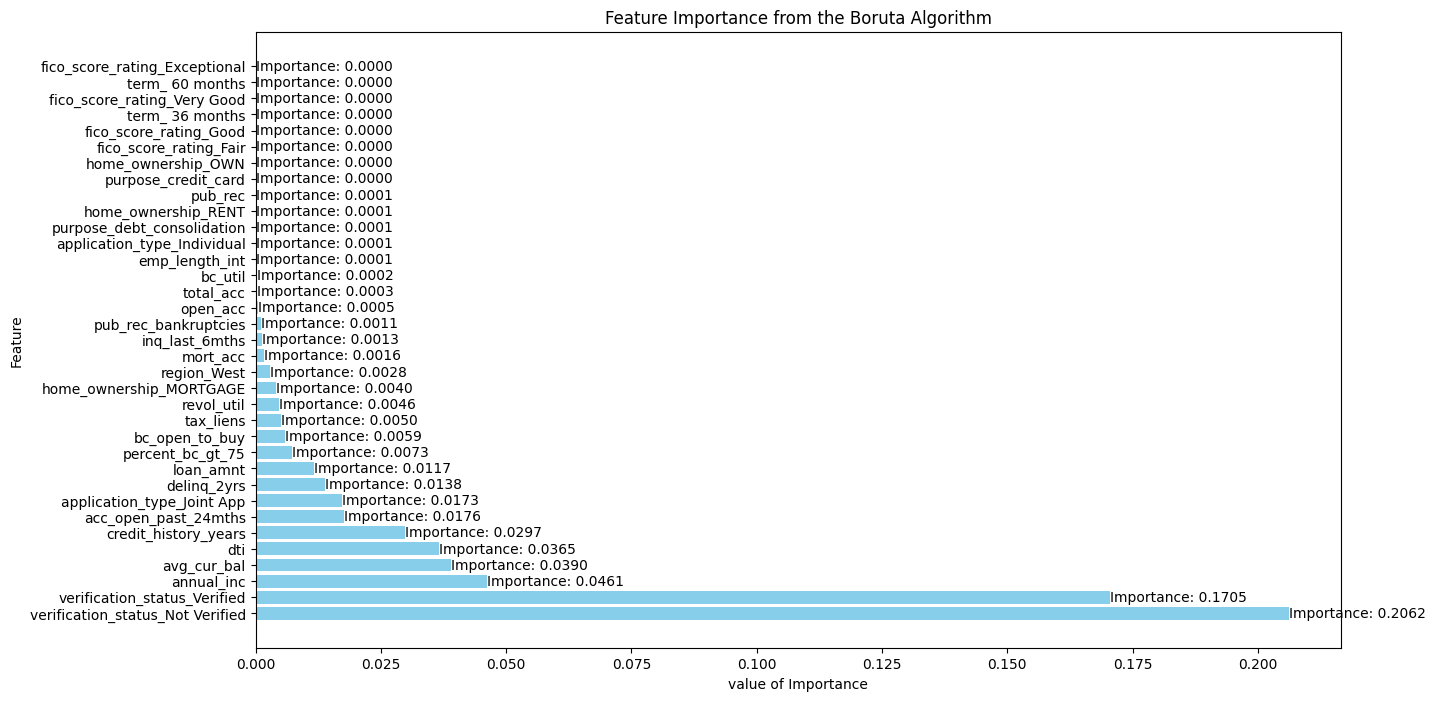

In [43]:
# Create the plot of the feature importance of the features after boruta algorithm feature selection technique.
import numpy as np
import matplotlib.pyplot as plt

# Get features from BorutaPy
selected_features = train_x.columns[boruta_fs.support_]
# Obtain the importance scores for the selected features from the RandomForestClassifier
feature_importances = boruta_fs.estimator.feature_importances_
# Find the indices of selected features
selected_feature_indices = [list(train_x.columns).index(feature) for feature in selected_features]
# Get feature names and importance value for selected features
selected_feature_names = selected_features
selected_feature_importances = feature_importances[selected_feature_indices]
# Sort selected features based on the importance values
sorted_indices = np.argsort(selected_feature_importances)[::-1]
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]
sorted_feature_importances = selected_feature_importances[sorted_indices]

# Plot feature importance plot
plt.figure(figsize=(14, 8))
bars = plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue', label='Importance')
for bar, importance in zip(bars, sorted_feature_importances):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'Importance: {importance:.4f}', ha='left', va='center')
plt.xlabel('value of Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from the Boruta Algorithm')
plt.show()


#### Load datasets

In [2]:
import os
new_dir = r'C:\Users\pangy\OneDrive - Asia Pacific University\Capstone project'
os.chdir(new_dir)

In [8]:
# Load all the datasets for model training
import pandas as pd
train_x_fs = pd.read_csv('CP_datasets2/train_x_fs.csv')
train_y = pd.read_csv('CP_datasets2/train_y.csv')
test_y = pd.read_csv('CP_datasets2/test_y.csv')
test_x_fs = pd.read_csv('CP_datasets2/test_x_fs.csv')
train_x = pd.read_csv('CP_datasets2/train_x.csv')
test_x = pd.read_csv('CP_datasets2/test_x.csv')

C:\Users\pangy\AppData\Local\Temp\ipykernel_22512\2249015847.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
train_x_fs.shape,train_y.shape,test_y.shape,test_x_fs.shape

((430971, 35), (430971, 1), (107743, 1), (107743, 35))